# Housing project

In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


## Loading train data

In [84]:
df_tr=pd.read_csv("train.csv")
df_tr

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

## Loading test data

In [85]:
df_ts=pd.read_csv("test.csv")
df_ts

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

## Understanding the Datasets:

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [86]:
df_tr.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [87]:
df_tr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Data Cleaning

From these informations we can already see that some features wont be relevant in our exploratory analysis as
there are too much missing values (such as Alley and PoolQC). 
Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. 
Let's just remove 'Id' and the features with 30% or less NaN values.

In [89]:
# df_tr.count() does not include NaN values
df2 = df_tr[[column for column in df_tr if df_tr[column].count() / len(df_tr) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df_tr.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df_tr = df2

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



Now lets take a look at how the housing price is distributed

FireplaceQu has 551 missing values, which is also pretty high.

In this case, the missing values have meaning, which is "NO Fireplace".



In [90]:
df_tr['FireplaceQu'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

Fireplace has the following categories:

Ex Excellent - Exceptional Masonry Fireplace
Gd Good - Masonry Fireplace in main level
TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
Fa Fair - Prefabricated Fireplace in basement
Po Poor - Ben Franklin Stove
NA No Fireplace

Let's check the correlation between FireplaceQu and SalePrice, to see how important this feature is in order to determine the price.

First, we will replace the missing values 

In [91]:
from sklearn.preprocessing import LabelEncoder
lencoder=LabelEncoder()
df_tr['FireplaceQu']=lencoder.fit_transform(df_tr['FireplaceQu'])

In [92]:
df_tr['FireplaceQu'].unique()

array([4, 2, 5, 1, 0, 3])

Using a barplot, we can see how the category of the FirePlace increases the value of SalePrice.

It is also worth noting how much higher the value is when the house has an Excellent fireplace.

This means we should keep FireplaceQu as feature.

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

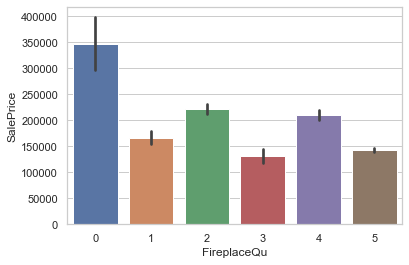

In [93]:
import seaborn as sns
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=df_tr)

Missing values in numeric columns
Another feature with a high number of missing values is LotFrontage with a count 204.

Let’s see the correlation between the remaining features with missing values and the SalePrice.

In [94]:
columns_with_miss = df_tr.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
df_tr[c].corr()

LotFrontage  MasVnrArea  GarageYrBlt  SalePrice
LotFrontage     1.000000    0.202225     0.061101   0.341294
MasVnrArea      0.202225    1.000000     0.254547   0.466386
GarageYrBlt     0.061101    0.254547     1.000000   0.474346
SalePrice       0.341294    0.466386     0.474346   1.000000

Note that LotFrontage, MasVnrArea, and GarageYrBlt have a positive correlation with SalePrice, but this correlation isn't very strong.

To simplify this analisys, we will remove theses columns for now:

In [95]:
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', \
 'MasVnrArea']
df_tr.drop(columns=cols_to_be_removed, inplace=True)

Finally, these are the remaining columns with missing values:

In [96]:
columns_with_miss = df_tr.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 10


GarageCond      64
GarageQual      64
GarageFinish    64
GarageType      64
BsmtFinType2    31
BsmtExposure    31
BsmtFinType1    30
BsmtCond        30
BsmtQual        30
MasVnrType       7
dtype: int64

## Categorical variables
Let's work on the categorical variables of our dataset.

Dealing with missing values
Filling Categorical NaN that we know how to fill due to the description file.

In [97]:
# Fills NA in place of NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', \
'BsmtExposure', 'BsmtFinType1']:
    df_tr[c].fillna('NA', inplace=True)
    
# Fills None in place of NaN
df_tr['MasVnrType'].fillna('None', inplace=True)

 With this have only 5 columns with missing values left in our dataset.

In [98]:
columns_with_miss = df_tr.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 4


GarageCond    64
GarageQual    64
BsmtCond      30
BsmtQual      30
dtype: int64

Ordinal
Also by reading the description file, we can identify other variables that have a similar system to FireplaceQu to categorize the quality: Poor, Good, Excellent, etc.

We are going to replicate the treatment we gave to FireplaceQu to these variables according to the following descriptions:

ExterQual: Evaluates the quality of the material on the exterior

Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor
ExterCond: Evaluates the present condition of the material on the exterior

Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor
BsmtQual: Evaluates the height of the basement

Ex Excellent (100+ inches)
Gd Good (90-99 inches)
TA Typical (80-89 inches)
Fa Fair (70-79 inches)
Po Poor ( < 70 inches)
NA No Basement
BsmtCond: Evaluates the general condition of the basement

Ex Excellent
Gd Good
TA Typical - slight dampness allowed
Fa Fair - dampness or some cracking or settling
Po Poor - Severe cracking, settling, or wetness
NA No Basement
HeatingQC: Heating quality and condition

Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor
KitchenQual: Kitchen quality

Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor
GarageQual: Garage quality

Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor
NA No Garage
GarageCond: Garage condition

Ex Excellent
Gd Good
TA Average/Typical
Fa Fair
Po Poor
NA No Garage

In [99]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    df_tr[col].fillna(0, inplace=True)
    df_tr[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, \
    'Ex': 5}, inplace=True)

Let's now plot the correlation of these variables with SalePrice.

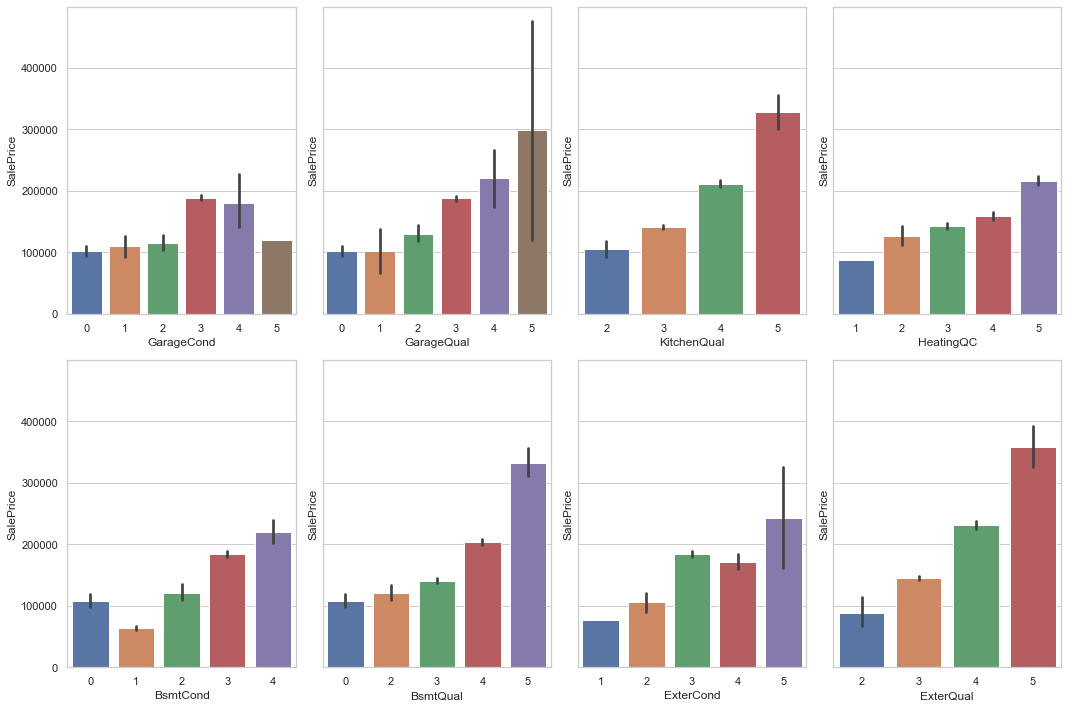

In [100]:
import matplotlib.pyplot as plt
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SalePrice", \
        data=df_tr, ax=axes[r][c])

plt.tight_layout()
plt.show()

As you can see, the better the category of a variable, the higher the price, which means these variables will be important for a prediction model.

# Nominal
Other categorical variables don't seem to follow any clear ordering.

Let's see how many values these columns can assume:

In [101]:
cols = df_tr.columns
num_cols = df_tr._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print(f'Nominal columns: {len(nom_cols)}')

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(df_tr[c].value_counts())

sorted_value_counts = {k: v for k, v in \
sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns: 30


{'Utilities': 1,
 'Street': 2,
 'CentralAir': 2,
 'LandSlope': 3,
 'PavedDrive': 3,
 'LotShape': 4,
 'LandContour': 4,
 'GarageFinish': 4,
 'MasVnrType': 4,
 'MSZoning': 5,
 'LotConfig': 5,
 'Electrical': 5,
 'BsmtExposure': 5,
 'BldgType': 5,
 'SaleCondition': 6,
 'RoofStyle': 6,
 'Heating': 6,
 'Foundation': 6,
 'GarageType': 7,
 'Functional': 7,
 'BsmtFinType2': 7,
 'BsmtFinType1': 7,
 'Condition2': 8,
 'HouseStyle': 8,
 'RoofMatl': 8,
 'Condition1': 9,
 'SaleType': 9,
 'Exterior1st': 14,
 'Exterior2nd': 15,
 'Neighborhood': 25}

Some categorical variables can assume several different values like Neighborhood.

To simplify, let's analyze only variables with 6 different values or less.

In [102]:
nom_cols_less_than_6 = []
for c in nom_cols:
    n_values = len(df_tr[c].value_counts())
    if n_values < 7:
        nom_cols_less_than_6.append(c)

print(f'Nominal columns with less than 6 values: \
{len(nom_cols_less_than_6)}')

Nominal columns with less than 6 values: 18


Plotting against SalePrice to have a better idea of how they affect it:

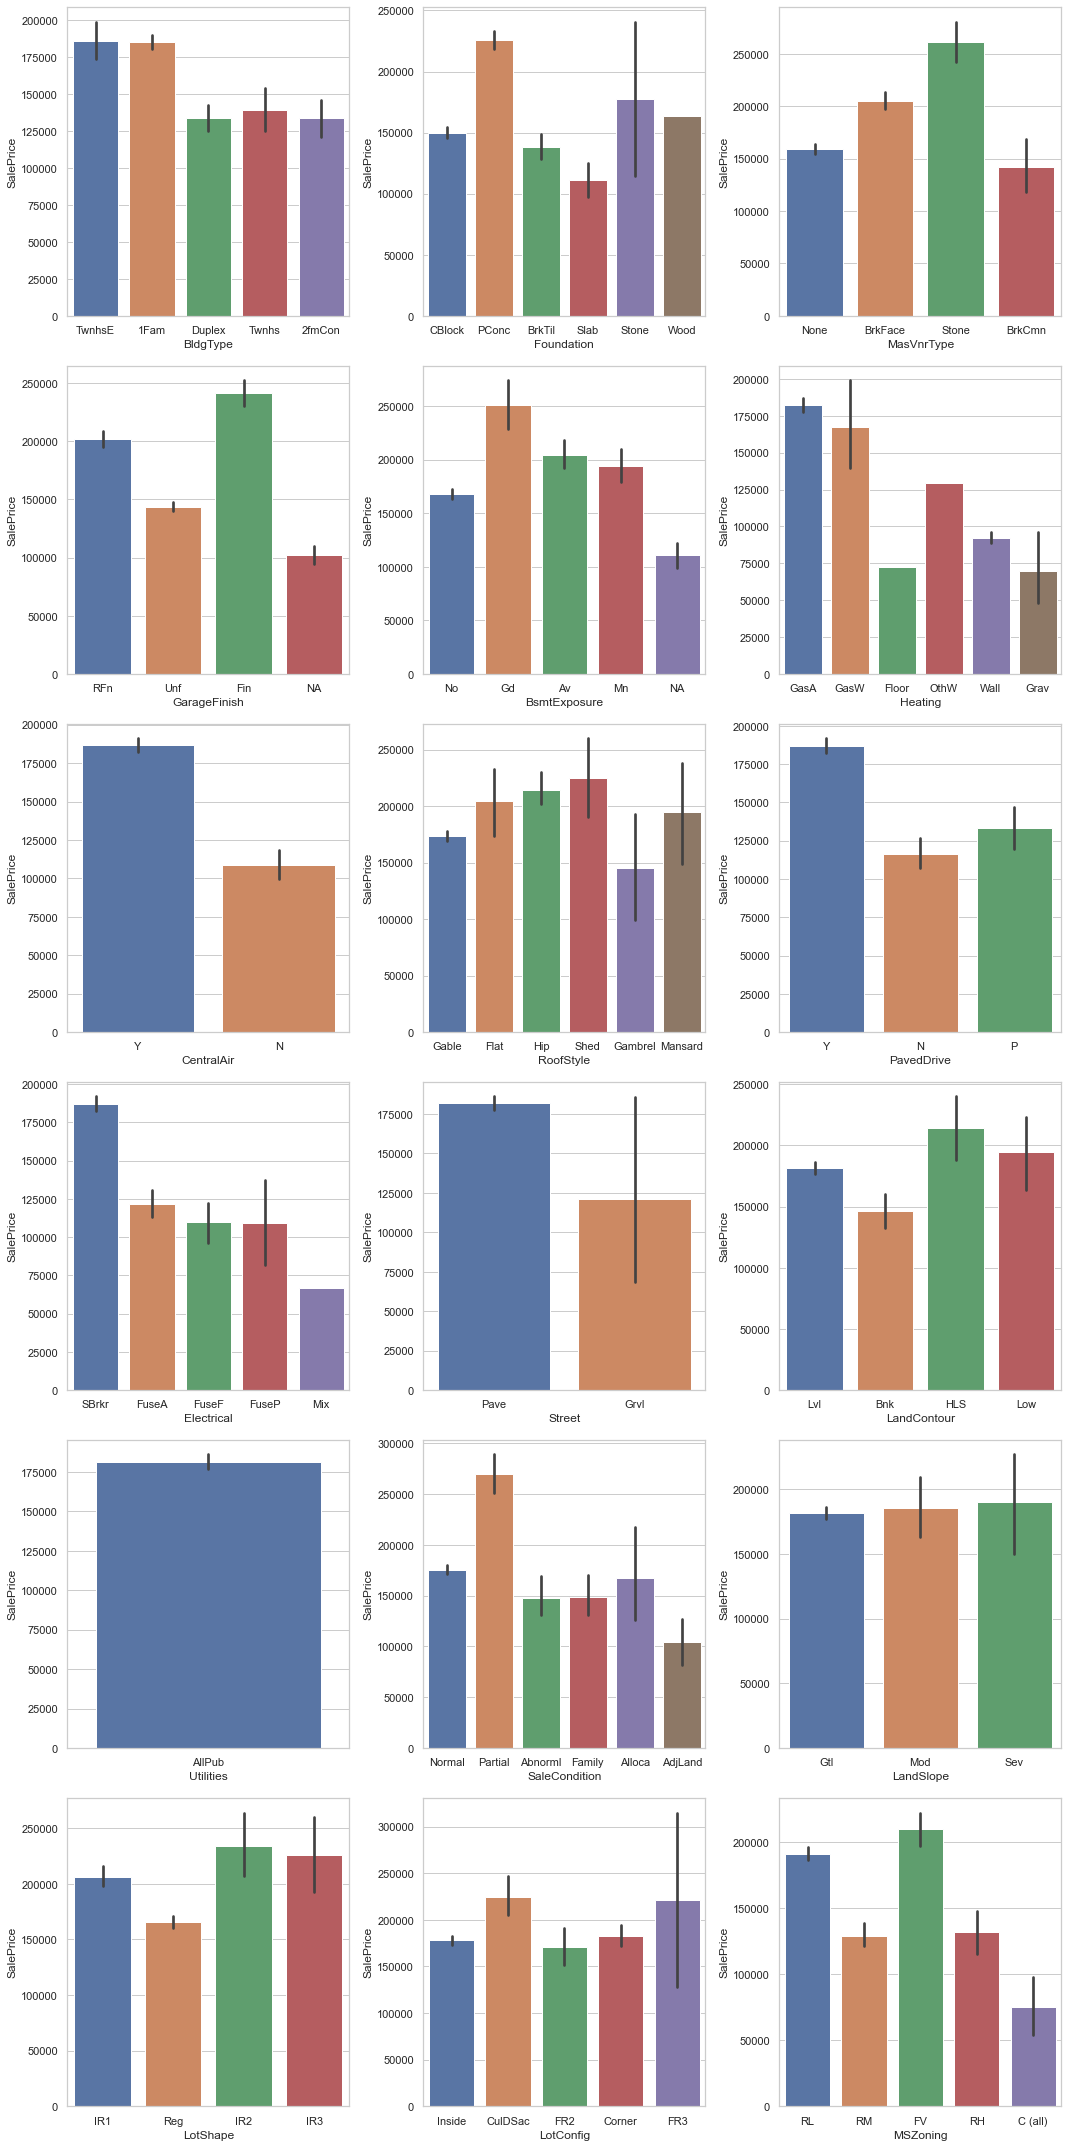

In [103]:
import math
ncols = 3
nrows = math.ceil(len(nom_cols_less_than_6) / ncols)
f, axes = plt.subplots(nrows, ncols, figsize=(15, 30))

for r in range(0, nrows):
    for c in range(0, ncols):
        if not nom_cols_less_than_6:
            continue
        sns.barplot(x=nom_cols_less_than_6.pop(), \
        y="SalePrice", data=df_tr, ax=axes[r][c])

plt.tight_layout()
plt.show()

We can see a good correlation of many of these columns with the target variable.

For now, let's keep them.

We still have NaN in 'Electrical'.

As we could see in the plot above, 'SBrkr' is the most frequent value in 'Electrical'.

Let's use this value to replace NaN in Electrical.

In [104]:
# Inputs more frequent value in place of NaN

df_tr['Electrical'].fillna('SBrkr', inplace=True)

# Zero values
Another quick check is to see how many columns have lots of data equals to 0.

In [105]:
df_tr.isin([0]).sum().sort_values(ascending=False).head(25)

PoolArea         1161
3SsnPorch        1146
LowQualFinSF     1145
MiscVal          1126
BsmtHalfBath     1105
ScreenPorch      1073
BsmtFinSF2       1032
EnclosedPorch     999
HalfBath          724
BsmtFullBath      686
2ndFlrSF          663
WoodDeckSF        603
Fireplaces        551
OpenPorchSF       531
BsmtFinSF1        375
BsmtUnfSF          97
GarageQual         64
GarageCars         64
GarageArea         64
GarageCond         64
TotalBsmtSF        30
BsmtQual           30
BsmtCond           30
FireplaceQu        21
FullBath            7
dtype: int64

In this case, even though there are many 0's, they have meaning.

For instance, PoolArea (Pool area in square feet) equals 0 means that the house doesn't have any pool area.

This is important information correlated to the house and thus, we are going to keep them.

In [106]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1168 non-null   int64 
 1   MSZoning       1168 non-null   object
 2   LotArea        1168 non-null   int64 
 3   Street         1168 non-null   object
 4   LotShape       1168 non-null   object
 5   LandContour    1168 non-null   object
 6   Utilities      1168 non-null   object
 7   LotConfig      1168 non-null   object
 8   LandSlope      1168 non-null   object
 9   Neighborhood   1168 non-null   object
 10  Condition1     1168 non-null   object
 11  Condition2     1168 non-null   object
 12  BldgType       1168 non-null   object
 13  HouseStyle     1168 non-null   object
 14  OverallQual    1168 non-null   int64 
 15  OverallCond    1168 non-null   int64 
 16  YearBuilt      1168 non-null   int64 
 17  YearRemodAdd   1168 non-null   int64 
 18  RoofStyle      1168 non-null

<AxesSubplot:>

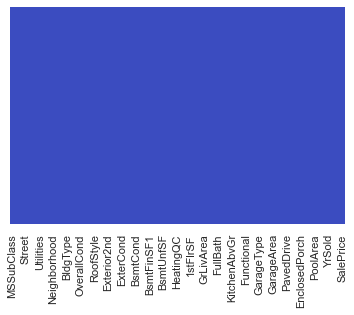

In [107]:
sns.heatmap(df_tr.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Now no null values are present hence now we do encoding of data.

# Categorical Variables

In [108]:
categorical_features=[feature for feature in df_tr.columns if df_tr[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [109]:
df_tr[categorical_features].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... BsmtFinType2 Heating CentralAir  \
0      NPkVill       Norm       Norm  ...          Unf    GasA          Y   
1        NAmes       Norm       Norm  ...          Rec    GasA          Y   
2      NoRidge       Norm       Norm  ...          Unf    GasA          Y   
3       NWAmes       Norm       Norm  ...          Unf    GasA          Y   
4       NWAmes       Norm       Norm  ...          Unf    GasA          Y   

  Electrical Functional GarageType GarageFinish PavedDrive SaleType  \
0      SBrkr        Typ     Attchd          RFn          Y       WD   
1      SBrkr        Typ     Attchd          Unf          Y       WD   
2      SBrkr        Typ     Attchd          Unf          Y       WD   
3      SBrkr        Typ     Attchd          RFn          Y      COD   
4      SBrkr        Typ     Attchd          Fin          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 30 columns]

In [110]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_tr[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 1
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of categories are 4
The feature is Foundation and number of

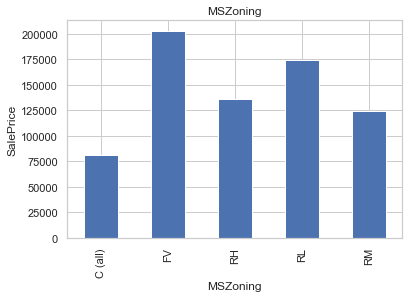

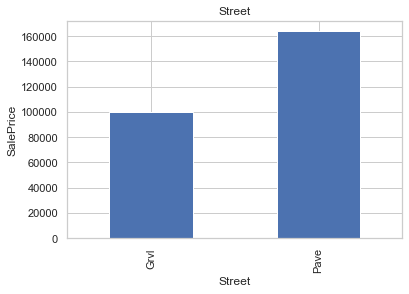

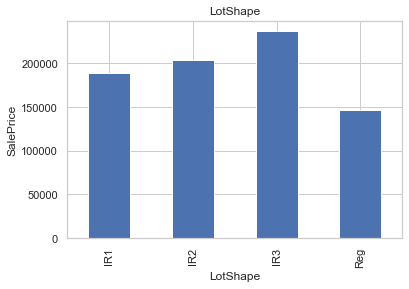

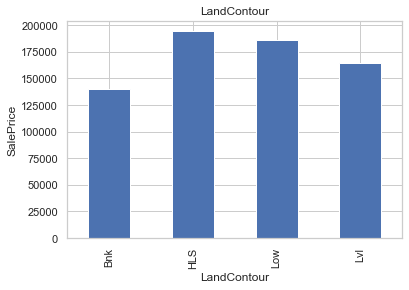

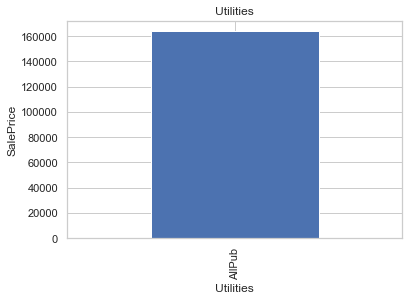

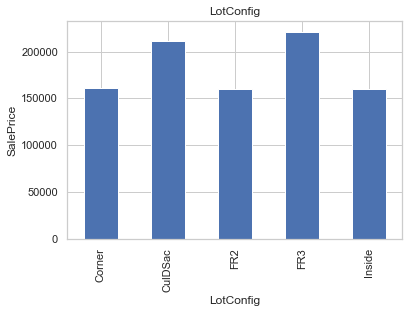

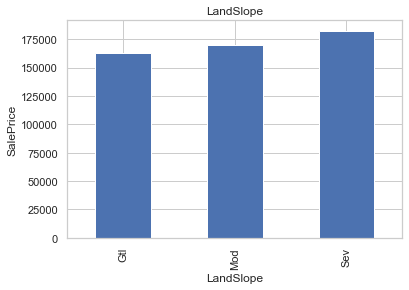

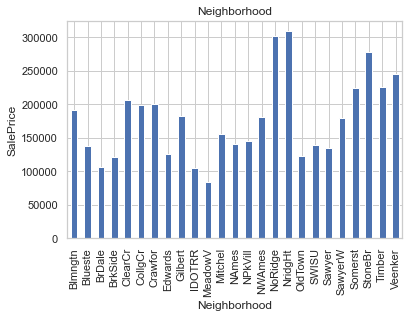

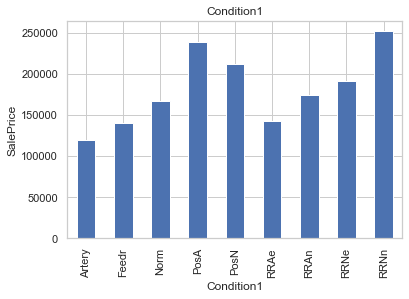

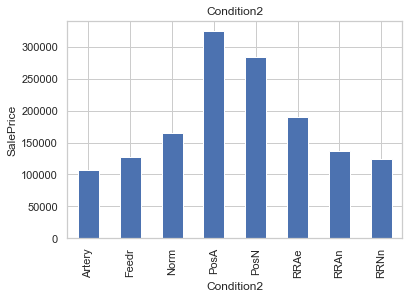

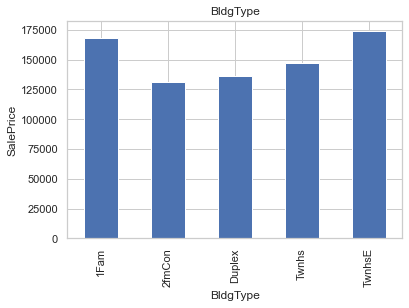

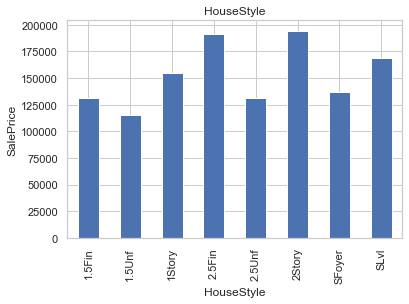

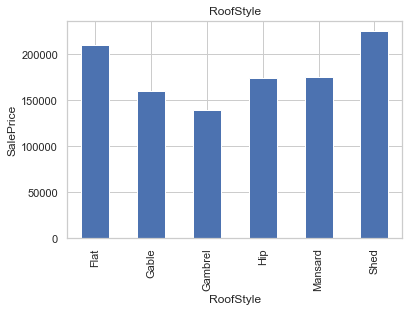

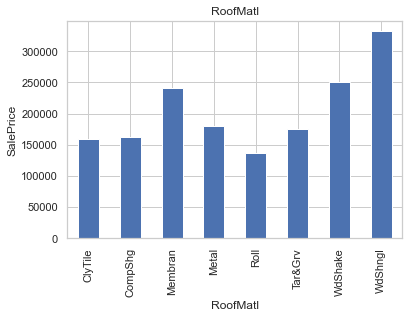

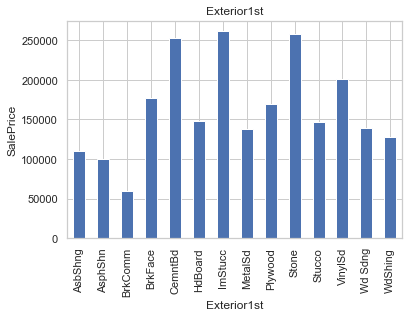

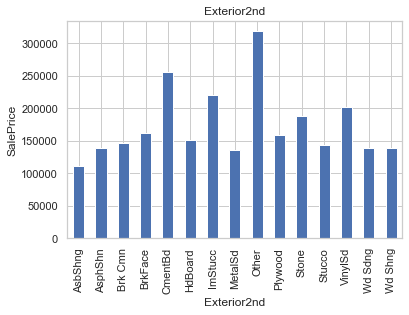

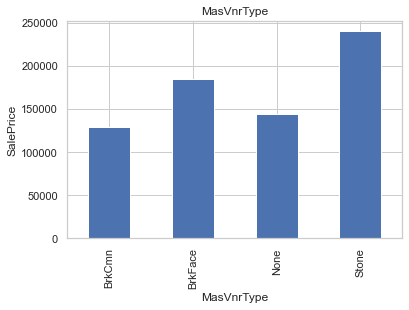

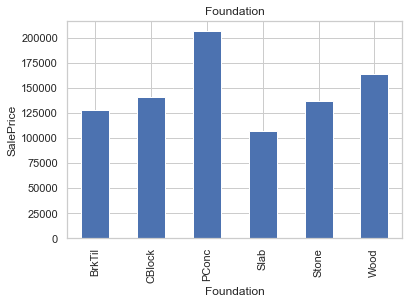

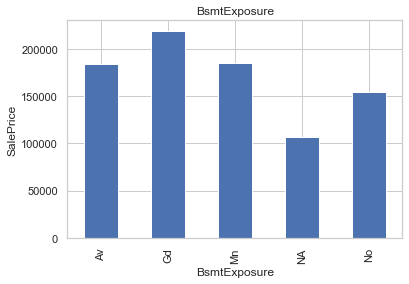

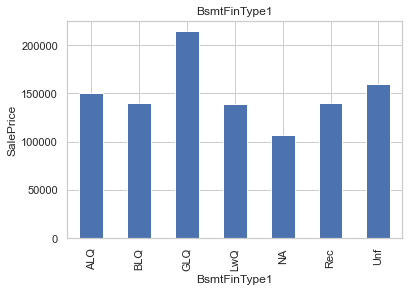

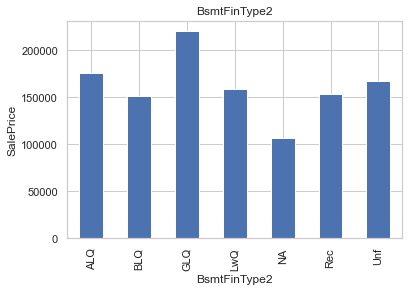

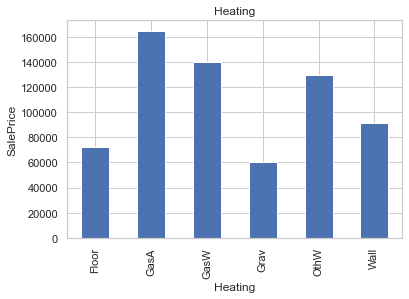

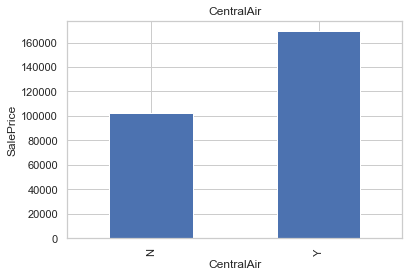

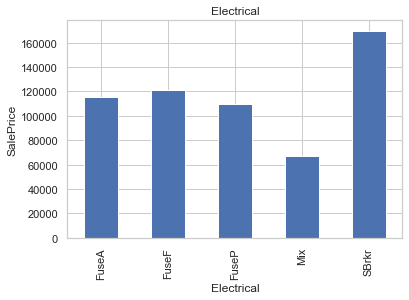

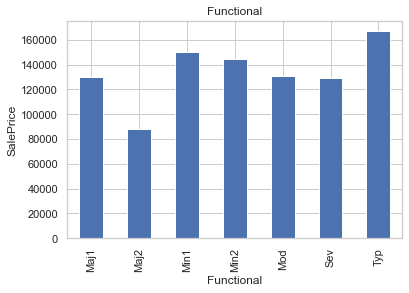

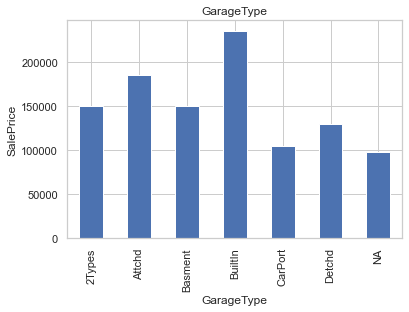

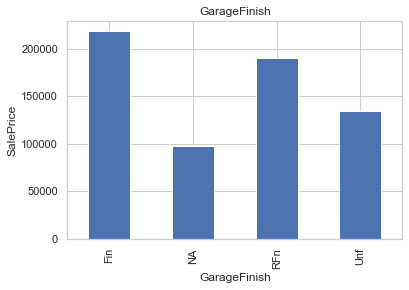

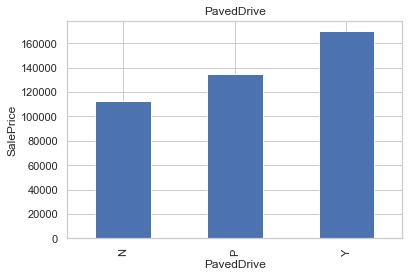

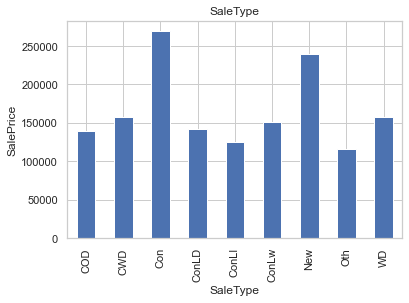

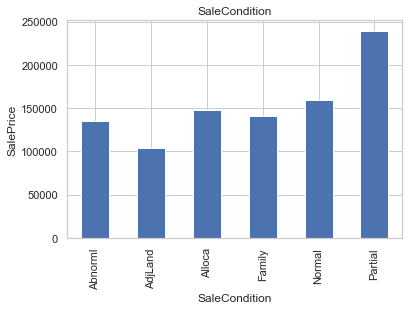

In [111]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data=df_tr.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Encoding of train data

In [112]:
for feature in categorical_features:
    labels_ordered=df_tr.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_tr[feature]=df_tr[feature].map(labels_ordered)

In [113]:

df_tr.head(10)

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0         120         3     4928       1         1            1          0   
1          20         3    15865       1         1            1          0   
2          60         3     9920       1         1            1          0   
3          20         3    11751       1         1            1          0   
4          20         3    16635       1         1            1          0   
5          60         3    14054       1         1            1          0   
6          20         3    11341       1         1            1          0   
7          20         3    13125       1         0            1          0   
8          20         3     9170       1         0            1          0   
9          50         3     8480       1         0            1          0   

   LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
0          1          0             8  ...              0          0   
1          1          1            10  ...              0          0   
2          4          0            24  ...              0          0   
3          1          0            13  ...              0          0   
4          0          0            13  ...              0          0   
5          1          0            14  ...              0          0   
6          1          0             6  ...              0          0   
7          2          0             6  ...              0          0   
8          2          0             4  ...            184          0   
9          1          0            10  ...            102          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2007         5              4   
1          224         0        0      10    2007         5              4   
2            0         0        0       6    2007         5              4   
3            0         0        0       1    2010         3              4   
4            0         0        0       6    2009         5              4   
5            0         0        0      11    2006         8              5   
6           95         0        0       5    2010         5              4   
7            0         0        0       1    2006         5              4   
8            0         0      400       4    2007         5              4   
9            0         0        0      10    2008         3              1   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  
5     219210  
6     121500  
7     155000  
8     140000  
9     118500  

[10 rows x 73 columns]

In [114]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1168 non-null   int64
 1   MSZoning       1168 non-null   int64
 2   LotArea        1168 non-null   int64
 3   Street         1168 non-null   int64
 4   LotShape       1168 non-null   int64
 5   LandContour    1168 non-null   int64
 6   Utilities      1168 non-null   int64
 7   LotConfig      1168 non-null   int64
 8   LandSlope      1168 non-null   int64
 9   Neighborhood   1168 non-null   int64
 10  Condition1     1168 non-null   int64
 11  Condition2     1168 non-null   int64
 12  BldgType       1168 non-null   int64
 13  HouseStyle     1168 non-null   int64
 14  OverallQual    1168 non-null   int64
 15  OverallCond    1168 non-null   int64
 16  YearBuilt      1168 non-null   int64
 17  YearRemodAdd   1168 non-null   int64
 18  RoofStyle      1168 non-null   int64
 19  RoofMa

# Outliers
We can also take a look at the outliers in the all the variables.

In [115]:
# Get only numerical columns
numerical_columns = \
list(df_tr.dtypes[df_tr.dtypes == 'int64'].index)

len(numerical_columns)

72

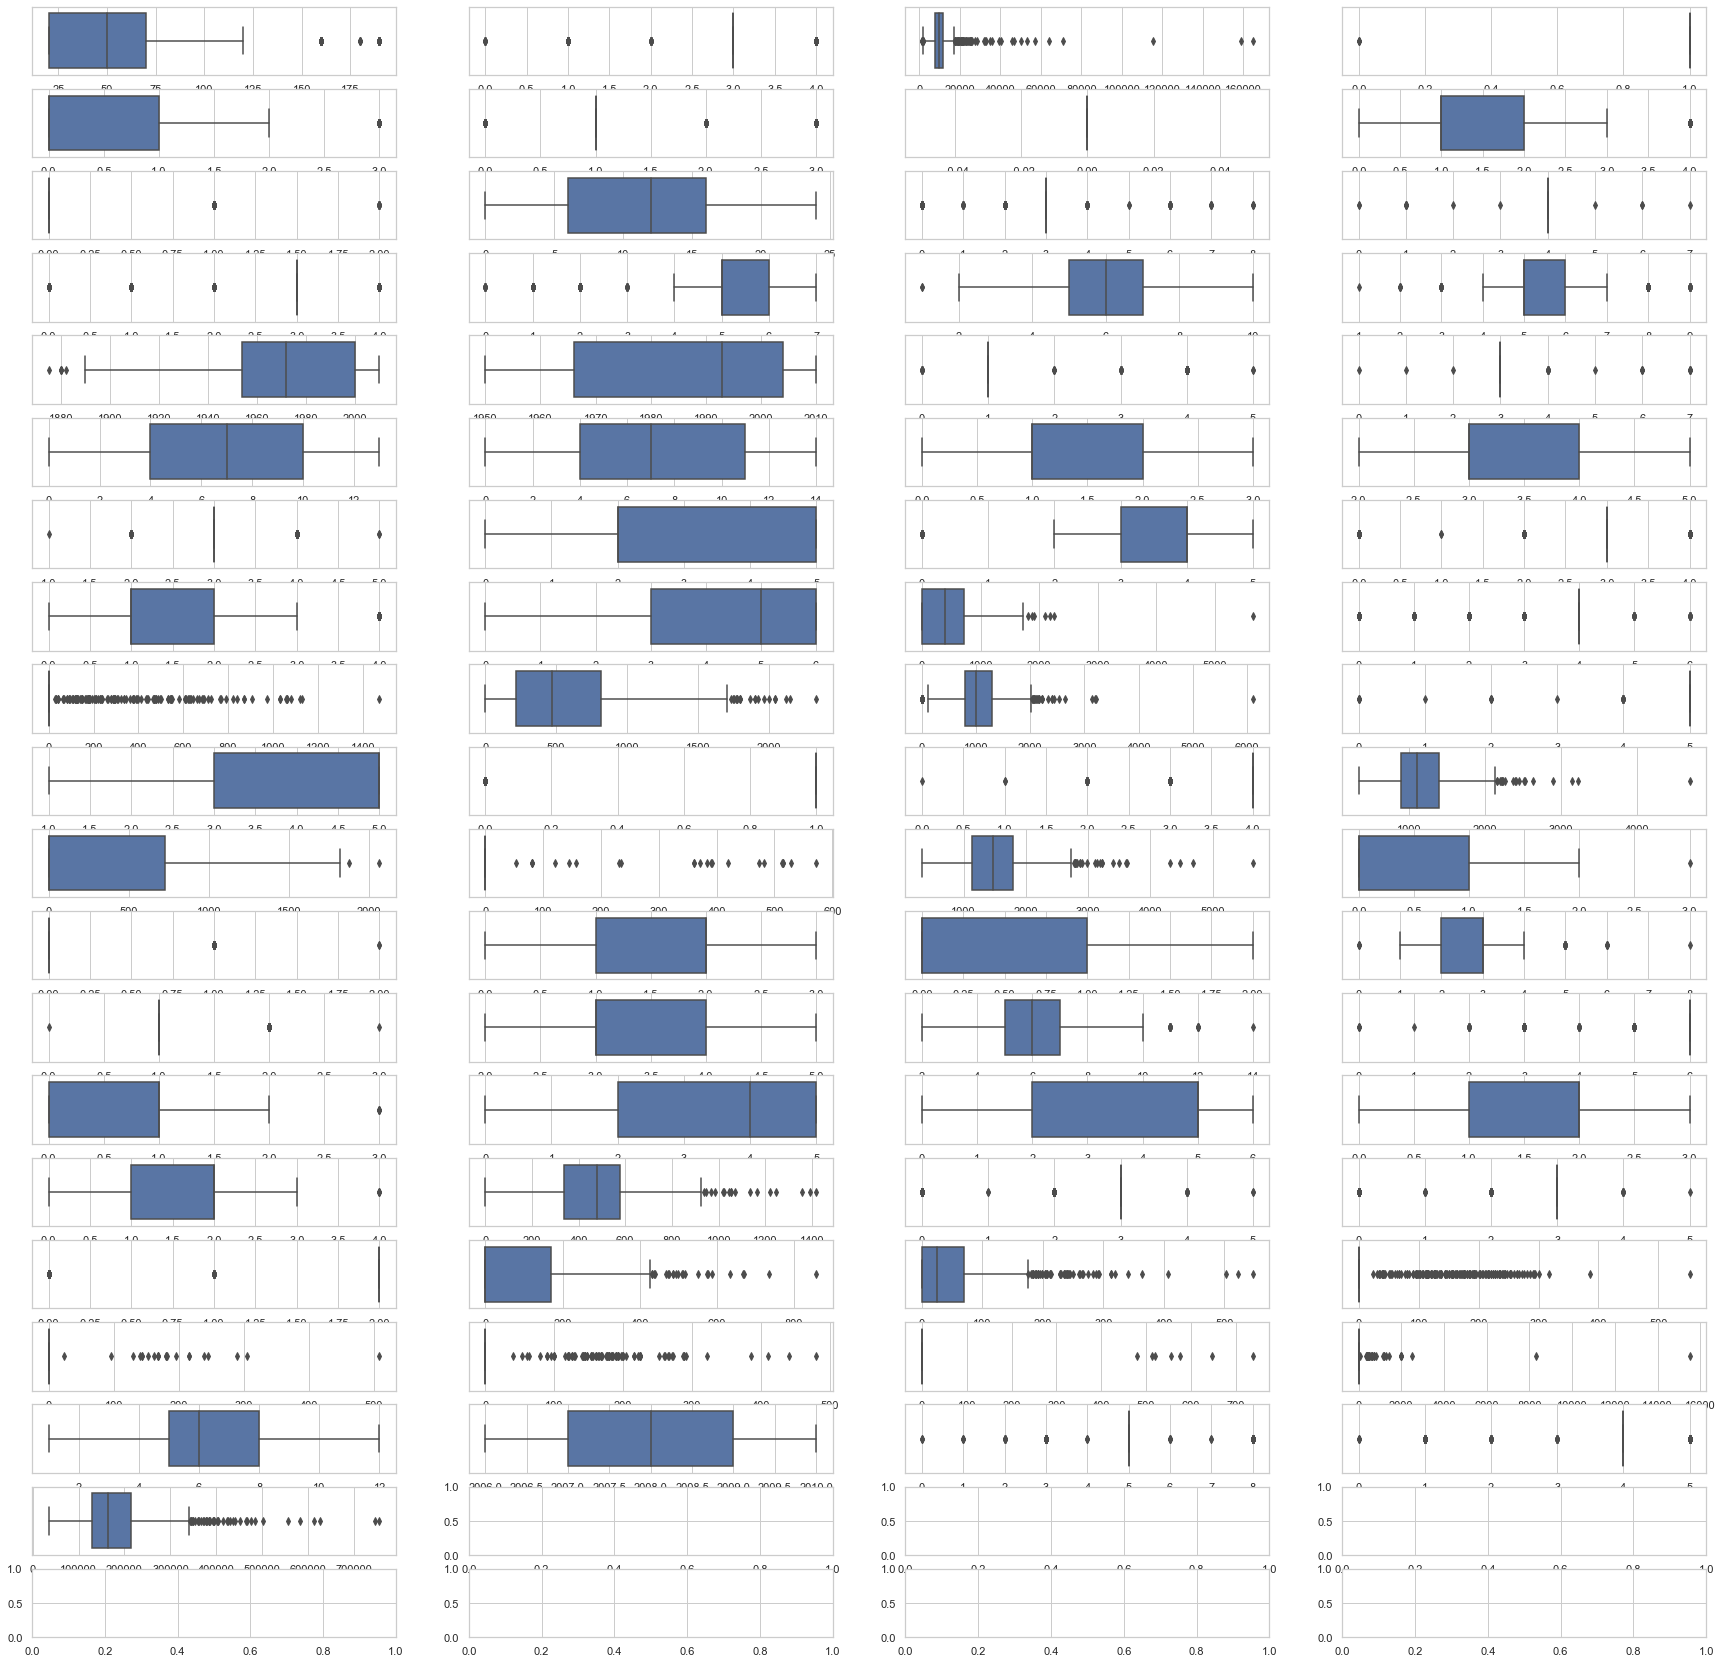

In [116]:
# Create the plot grid
rows = 20
columns = 4

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(df_tr.columns):
    sns.boxplot(x=df_tr[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

outliers are present in train dataset

In [117]:
df_tr.describe()

MSSubClass     MSZoning        LotArea       Street     LotShape  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979     2.728596   10484.749144     0.996575     0.426370   
std      41.940650     0.782721    8957.442311     0.058445     0.647762   
min      20.000000     0.000000    1300.000000     0.000000     0.000000   
25%      20.000000     3.000000    7621.500000     1.000000     0.000000   
50%      50.000000     3.000000    9522.500000     1.000000     0.000000   
75%      70.000000     3.000000   11515.500000     1.000000     1.000000   
max     190.000000     4.000000  164660.000000     1.000000     3.000000   

       LandContour  Utilities    LotConfig    LandSlope  Neighborhood  ...  \
count  1168.000000     1168.0  1168.000000  1168.000000   1168.000000  ...   
mean      1.054795        0.0     1.342466     0.064212     11.979452  ...   
std       0.457718        0.0     0.800072     0.284088      6.355338  ...   
min       0.000000        0.0     0.000000     0.000000      0.000000  ...   
25%       1.000000        0.0     1.000000     0.000000      6.000000  ...   
50%       1.000000        0.0     1.000000     0.000000     12.000000  ...   
75%       1.000000        0.0     2.000000     0.000000     16.000000  ...   
max       3.000000        0.0     4.000000     2.000000     24.000000  ...   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean       23.015411     3.639555    15.051370     3.448630     47.315068   
std        63.191089    29.088867    55.080816    44.896939    543.264432   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     5.165240       3.829623  181477.005993  
std       2.686352     1.329738     1.055897       0.902769   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     5.000000       4.000000  130375.000000  
50%       6.000000  2008.000000     5.000000       4.000000  163995.000000  
75%       8.000000  2009.000000     5.000000       4.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 73 columns]

<AxesSubplot:>

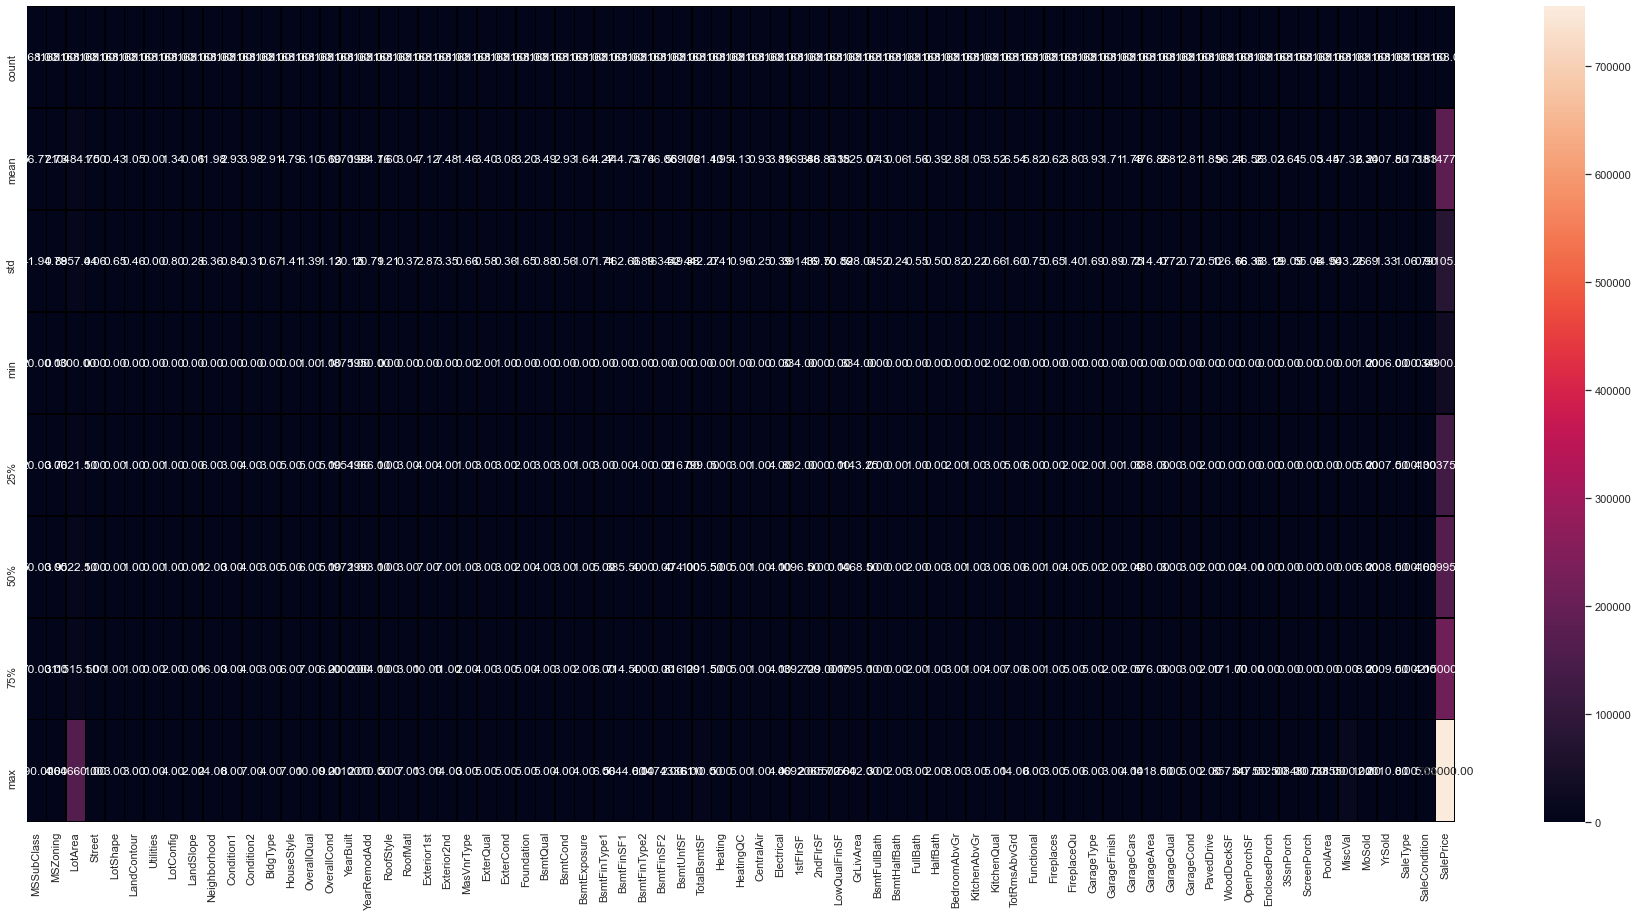

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32,15))
sns.heatmap(df_tr.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

In [119]:
df_tr.corr()

MSSubClass  MSZoning   LotArea    Street  LotShape  \
MSSubClass       1.000000 -0.175138 -0.124151 -0.035981 -0.088803   
MSZoning        -0.175138  1.000000  0.137529  0.092054  0.192938   
LotArea         -0.124151  0.137529  1.000000 -0.263973  0.310221   
Street          -0.035981  0.092054 -0.263973  1.000000  0.015968   
LotShape        -0.088803  0.192938  0.310221  0.015968  1.000000   
...                   ...       ...       ...       ...       ...   
MoSold          -0.016015  0.012268  0.015141 -0.008860  0.052001   
YrSold          -0.038595  0.009155 -0.035399 -0.019635 -0.019685   
SaleType        -0.044334  0.165248  0.034301  0.050834  0.053509   
SaleCondition   -0.032775  0.135809  0.039612  0.005173  0.055459   
SalePrice       -0.060775  0.307349  0.249499  0.044753  0.253188   

               LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
MSSubClass       -0.013532        NaN  -0.069133  -0.014930     -0.022110   
MSZoning          0.020019        NaN   0.060975  -0.006338      0.537017   
LotArea           0.162682        NaN   0.233736   0.395410      0.163853   
Street           -0.057043        NaN   0.006778  -0.141572      0.050564   
LotShape          0.140784        NaN   0.313245   0.135142      0.252742   
...                    ...        ...        ...        ...           ...   
MoSold            0.082215        NaN  -0.008640   0.030526      0.090508   
YrSold           -0.007753        NaN  -0.002350  -0.005352     -0.034037   
SaleType          0.061035        NaN  -0.003140  -0.032546      0.306460   
SaleCondition     0.053718        NaN  -0.005753  -0.064223      0.215652   
SalePrice         0.116212        NaN   0.130486   0.015485      0.692423   

               ...  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
MSSubClass     ...      -0.004252  -0.043210    -0.013291  0.009583 -0.023503   
MSZoning       ...      -0.218155   0.031905     0.005929  0.026657  0.010513   
LotArea        ...      -0.007446   0.025794     0.025256  0.097107  0.051679   
Street         ...       0.021360   0.007338     0.016026  0.004505 -0.030354   
LotShape       ...      -0.095223   0.028400     0.079169  0.031073  0.031843   
...            ...            ...        ...          ...       ...       ...   
MoSold         ...      -0.036523   0.020406     0.033064 -0.038624 -0.008773   
YrSold         ...      -0.005767   0.014440     0.017312 -0.066063 -0.008439   
SaleType       ...      -0.113798   0.022586    -0.002518  0.013998 -0.017645   
SaleCondition  ...      -0.092723   0.006013     0.004433 -0.058620  0.011010   
SalePrice      ...      -0.115004   0.060119     0.100284  0.103280 -0.013071   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
MSSubClass    -0.016015 -0.038595 -0.044334      -0.032775  -0.060775  
MSZoning       0.012268  0.009155  0.165248       0.135809   0.307349  
LotArea        0.015141 -0.035399  0.034301       0.039612   0.249499  
Street        -0.008860 -0.019635  0.050834       0.005173   0.044753  
LotShape       0.052001 -0.019685  0.053509       0.055459   0.253188  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.144536  0.078114       0.003354   0.072764  
YrSold        -0.144536  1.000000 -0.128971       0.028663  -0.045508  
SaleType       0.078114 -0.128971  1.000000       0.462849   0.348792  
SaleCondition  0.003354  0.028663  0.462849       1.000000   0.243899  
SalePrice      0.072764 -0.045508  0.348792       0.243899   1.000000  

[73 rows x 73 columns]

<Figure size 432x288 with 0 Axes>

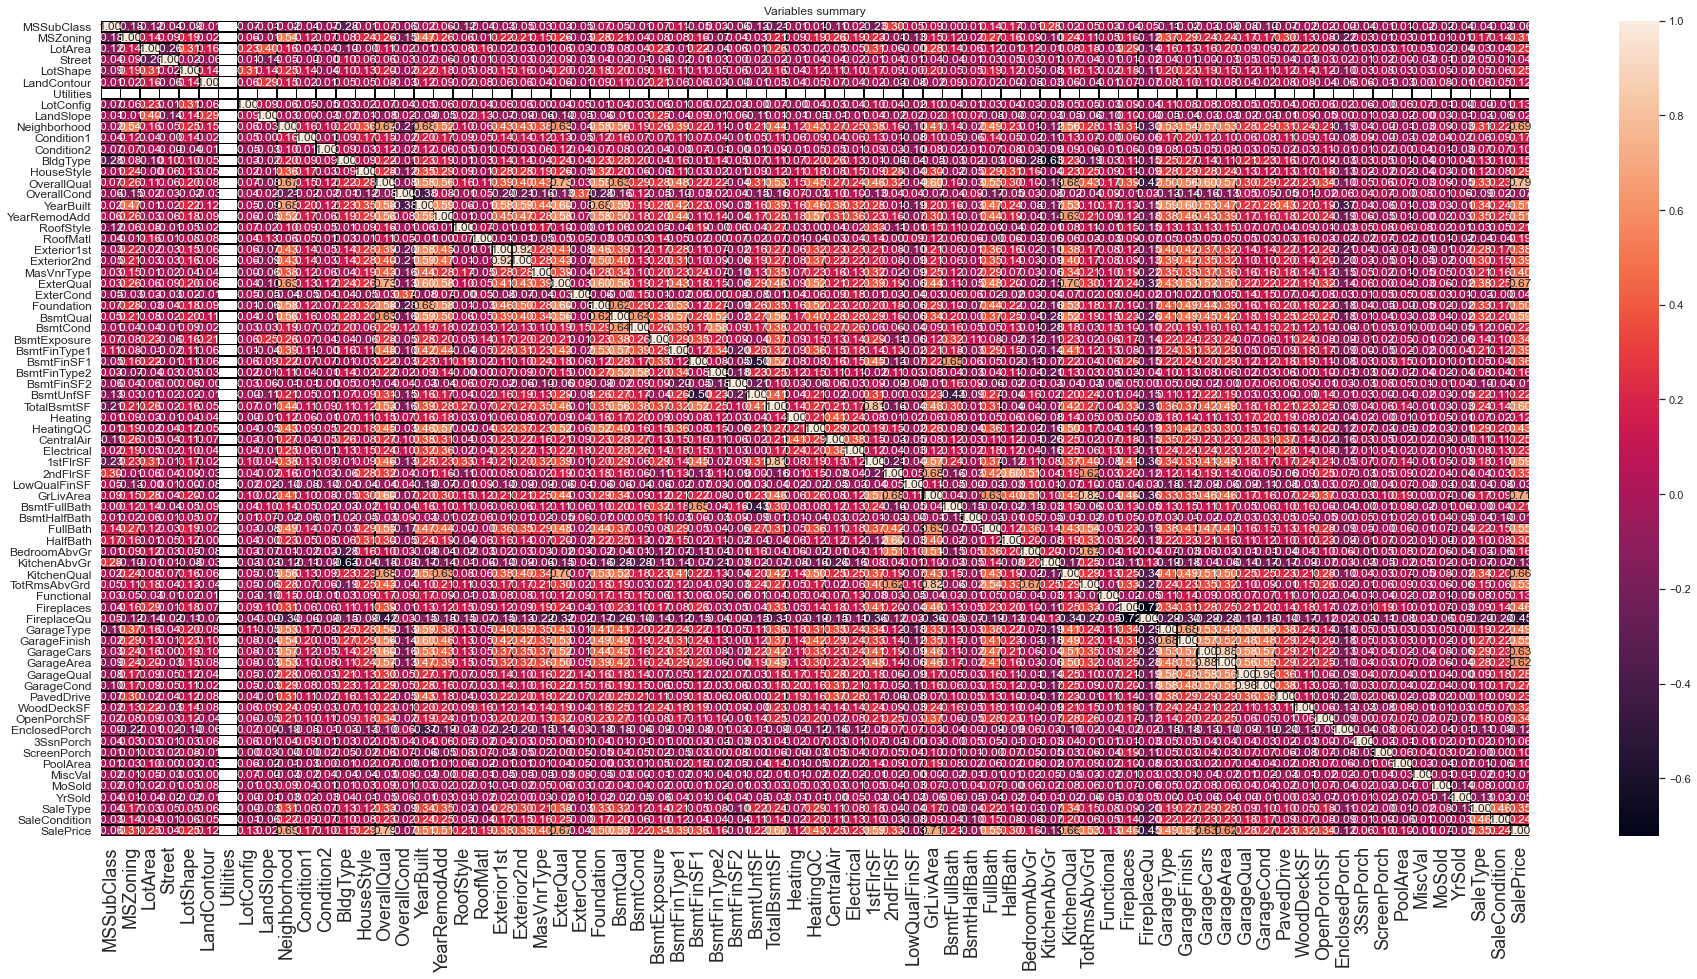

In [120]:
plt.figure()
plt.figure(figsize=(32,15))
sns.heatmap(df_tr.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [121]:
df_tr.skew()

MSSubClass        1.422019
MSZoning         -1.620873
LotArea          10.659285
Street          -17.021969
LotShape          1.847903
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType          0.786554
SaleCondition    -2.332256
SalePrice         1.953878
Length: 73, dtype: float64

# Removing skewness of train dataset by transforming data:

In [191]:
x=df_tr.iloc[:,:-1]
x

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0            120         3     4928       1         1            1          0   
1             20         3    15865       1         1            1          0   
2             60         3     9920       1         1            1          0   
3             20         3    11751       1         1            1          0   
4             20         3    16635       1         1            1          0   
...          ...       ...      ...     ...       ...          ...        ...   
1163          20         3     9819       1         1            1          0   
1164          20         3     8777       1         0            1          0   
1165         160         3     2280       1         0            1          0   
1166          70         0     8500       1         0            1          0   
1167          60         3     7861       1         1            1          0   

      LotConfig  LandSlope  Neighborhood  ...  OpenPorchSF  EnclosedPorch  \
0             1          0             8  ...          205              0   
1             1          1            10  ...          207              0   
2             4          0            24  ...          130              0   
3             1          0            13  ...          122              0   
4             0          0            13  ...            0              0   
...         ...        ...           ...  ...          ...            ...   
1163          1          0             6  ...            0              0   
1164          1          0             4  ...           96              0   
1165          0          0             8  ...            0              0   
1166          1          0             1  ...           54            172   
1167          1          0            14  ...           75              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       2    2007         5   
1             0          224         0        0      10    2007         5   
2             0            0         0        0       6    2007         5   
3             0            0         0        0       1    2010         3   
4             0            0         0        0       6    2009         5   
...         ...          ...       ...      ...     ...     ...       ...   
1163          0            0         0        0       2    2010         5   
1164          0            0         0        0       5    2009         5   
1165          0            0         0        0       7    2009         5   
1166          0            0         0        0       7    2008         5   
1167          0            0         0        0       6    2006         5   

      SaleCondition  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
...             ...  
1163              4  
1164              4  
1165              4  
1166              4  
1167              4  

[1168 rows x 72 columns]

In [192]:
y=df_tr.iloc[:,-1]
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [193]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling the train data

In [194]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_t=sc.fit_transform(x)


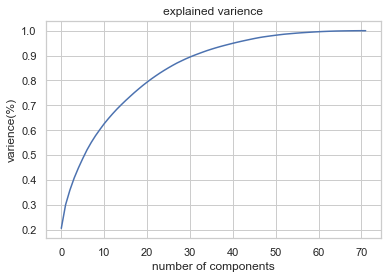

In [195]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x_t)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("varience(%)")
plt.title("explained varience")
plt.show()

In [196]:
pca=PCA(n_components=60)
new_data=pca.fit_transform(x_t)
principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                           'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20',
                                           'PC-21','PC-22','PC-23','PC-24','PC-25','PC-26','PC-27','PC-28','PC-29','PC-30',
                                           'PC-31','PC-32','PC-33','PC-34','PC-35','PC-36','PC-37','PC-38','PC-39','PC-40',
                                           'PC-41','PC-42','PC-43','PC-44','PC-45','PC-46','PC-47','PC-48','PC-49','PC-50',
                                            'PC-51','PC-52','PC-53','PC-54','PC-55','PC-56','PC-57','PC-58','PC-59','PC-60'])

In [197]:
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0     0.078518 -0.157019 -0.004592 -0.467546 -0.505744 -0.105343 -0.218866   
1    -0.362268 -0.817476  0.855887 -0.087227 -0.221052  0.268060 -0.224786   
2    -0.986077  0.450274  0.419103  0.490478 -0.107325  0.270119 -0.450477   
3    -0.090856 -0.522034  0.024053 -0.571825 -0.559667 -0.177281 -0.129640   
4    -0.405361 -0.702150  0.174039 -0.305830 -0.338873  0.499555  0.469023   
...        ...       ...       ...       ...       ...       ...       ...   
1163  1.037982 -0.460700 -0.093690 -0.005872 -0.758903  0.033092 -0.068464   
1164  0.680926 -0.194209 -0.765050 -0.238767 -0.210584 -0.293719  0.202682   
1165  0.167467  0.876760  0.349534  0.335065  0.177620 -0.023773  0.659465   
1166  1.351199  0.958434 -0.538181 -0.123178  0.396798  0.304474 -0.681446   
1167 -1.311955  0.424411  0.330831  0.199027 -0.058725  0.096988 -0.295949   

          PC-8      PC-9     PC-10  ...     PC-51     PC-52     PC-53  \
0    -0.201651 -0.163610 -0.245756  ... -0.008572  0.005547 -0.101404   
1    -0.277202  0.322756  0.184634  ... -0.142120 -0.136337  0.075925   
2    -0.303667 -0.124464  0.057353  ... -0.105799 -0.090798  0.097728   
3     0.607947 -0.224511  0.235223  ...  0.020927 -0.050639 -0.090117   
4     0.310774 -0.073991 -0.215328  ... -0.059064  0.110979  0.025191   
...        ...       ...       ...  ...       ...       ...       ...   
1163  0.543117 -0.341834 -0.225885  ...  0.019257  0.020317  0.039080   
1164  0.373311  0.089428  0.688816  ...  0.116063 -0.000041 -0.053505   
1165  0.101571 -0.338248 -0.278446  ... -0.103394 -0.069388 -0.069215   
1166  0.054728  0.143892  0.491116  ...  0.058841  0.171177  0.175935   
1167 -0.376255 -0.037634  0.021905  ...  0.009063 -0.124119  0.015855   

         PC-54     PC-55     PC-56     PC-57     PC-58     PC-59     PC-60  
0    -0.008822 -0.066109  0.034097 -0.013046 -0.027058 -0.030993  0.051213  
1    -0.081789  0.010646 -0.068131 -0.024182  0.035406 -0.032901 -0.016933  
2     0.005965 -0.027345 -0.021128  0.028879 -0.025970  0.064831 -0.026984  
3    -0.133994  0.089578  0.030829  0.012552 -0.061697 -0.028400 -0.035660  
4    -0.033678  0.001886  0.100317  0.024205 -0.001382 -0.010203 -0.012753  
...        ...       ...       ...       ...       ...       ...       ...  
1163  0.029633  0.048929 -0.067935  0.077767  0.155020  0.005855  0.023794  
1164  0.016585 -0.000326  0.202091 -0.082090 -0.039884  0.062120 -0.014064  
1165 -0.003687 -0.095686 -0.121246 -0.091988 -0.091491  0.046018 -0.258901  
1166 -0.055614  0.072645  0.056297 -0.073863 -0.105821  0.053771  0.032138  
1167 -0.020806 -0.054383  0.039980  0.096650 -0.018168 -0.013861  0.000349  

[1168 rows x 60 columns]

# Now we do EDA on test data

Loading test data

In [129]:
df_ts.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [130]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [131]:
percent_missing = df_ts.isnull().sum() * 100 / len(df_ts)
percent_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      15.410959
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
Length: 80, dtype: float64

# Data Cleaning
From these informations we can already see that some features wont be relevant in our exploratory analysis as there are too much missing values (such as Alley and PoolQC). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove 'Id' and the features with 30% or less NaN values.

In [132]:
# df_tr.count() does not include NaN values
df3 = df_ts[[column for column in df_ts if df_ts[column].count() / len(df_ts) >= 0.3]]
del df3['Id']
print("List of dropped columns:", end=" ")
for c in df_ts.columns:
    if c not in df3.columns:
        print(c, end=", ")
print('\n')
df_ts = df3

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



In [133]:
df_ts['FireplaceQu'].unique()

array(['Gd', 'Ex', 'TA', nan, 'Fa', 'Po'], dtype=object)

 

Now lets take a look at how the housing price is distributed

FireplaceQu has 551 missing values, which is also pretty high.

In this case, the missing values have meaning, which is "NO Fireplace".

In [134]:
lencoder=LabelEncoder()
df_ts['FireplaceQu']=lencoder.fit_transform(df_ts['FireplaceQu'])

In [135]:
df_ts['FireplaceQu'].unique()

array([2, 0, 4, 5, 1, 3])

Using a barplot, we can see how the category of the FirePlace increases the value of SalePrice.

It is also worth noting how much higher the value is when the house has an Excellent fireplace.

This means we should keep FireplaceQu as feature.

<AxesSubplot:ylabel='FireplaceQu'>

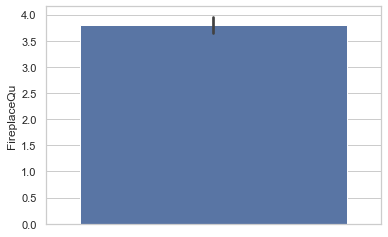

In [136]:
import seaborn as sns
sns.set(style="whitegrid")
sns.barplot(y='FireplaceQu', data=df_ts)

5    139
2     79
4     61
1      8
0      3
3      2
Name: FireplaceQu, dtype: int64


<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

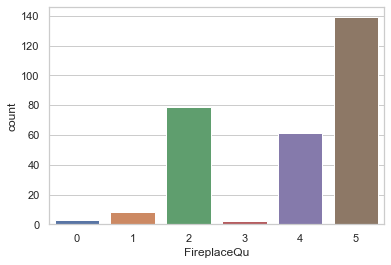

In [137]:
ax=df_ts['FireplaceQu'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['FireplaceQu'])

In [138]:
total = df_ts.isnull().sum().sort_values(ascending=False)
percent = (df_ts.isnull().sum()/df_ts.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
LotFrontage       45  0.154110
GarageFinish      17  0.058219
GarageType        17  0.058219
GarageCond        17  0.058219
GarageQual        17  0.058219
GarageYrBlt       17  0.058219
BsmtFinType1       7  0.023973
BsmtExposure       7  0.023973
BsmtCond           7  0.023973
BsmtQual           7  0.023973
BsmtFinType2       7  0.023973
MasVnrArea         1  0.003425
Electrical         1  0.003425
MasVnrType         1  0.003425
RoofMatl           0  0.000000
Exterior1st        0  0.000000
SaleCondition      0  0.000000
Exterior2nd        0  0.000000
YearRemodAdd       0  0.000000
ExterQual          0  0.000000

## Filling missing data

In [139]:
cols_fillna = ['GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','MasVnrType'
               ]

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df_ts[col].fillna('None',inplace=True)

In [140]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea

df_ts.fillna(df_ts.mean(), inplace=True)

In [141]:
total = df_ts.isnull().sum().sort_values(ascending=False)
percent = (df_ts.isnull().sum()/df_ts.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total  Percent
SaleCondition      0      0.0
YearRemodAdd       0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0
Exterior2nd        0      0.0
MasVnrType         0      0.0
MasVnrArea         0      0.0
ExterQual          0      0.0
ExterCond          0      0.0
Foundation         0      0.0

In [142]:
df_ts.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [143]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

In [144]:
df_ts.shape

(292, 75)

# Numerical and Categorical features

In [145]:
numerical_feats = df_ts.dtypes[df_ts.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_ts.dtypes[df_ts.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  38


In [146]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_ts[col].skew()) , 
           
         )

MSSubClass      Skewness: 01.36
LotFrontage     Skewness: 00.47
LotArea         Skewness: 12.78
OverallQual     Skewness: 00.40
OverallCond     Skewness: 01.21
YearBuilt       Skewness: -0.76
YearRemodAdd    Skewness: -0.54
MasVnrArea      Skewness: 01.98
BsmtFinSF1      Skewness: 00.74
BsmtFinSF2      Skewness: 03.70
BsmtUnfSF       Skewness: 00.96
TotalBsmtSF     Skewness: 00.52
1stFlrSF        Skewness: 00.69
2ndFlrSF        Skewness: 00.77
LowQualFinSF    Skewness: 10.93
GrLivArea       Skewness: 01.01
BsmtFullBath    Skewness: 00.46
BsmtHalfBath    Skewness: 03.54
FullBath        Skewness: -0.05
HalfBath        Skewness: 00.76
BedroomAbvGr    Skewness: 00.08
KitchenAbvGr    Skewness: 04.85
TotRmsAbvGrd    Skewness: 00.81
Fireplaces      Skewness: 00.54
FireplaceQu     Skewness: -0.73
GarageYrBlt     Skewness: -0.68
GarageCars      Skewness: -0.28
GarageArea      Skewness: 00.13
WoodDeckSF      Skewness: 01.71
OpenPorchSF     Skewness: 02.19
EnclosedPorch   Skewness: 03.18
3SsnPorc

Skewness: 1.010586


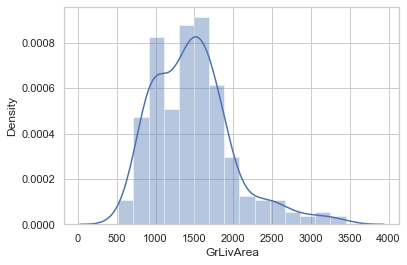

In [147]:
sns.distplot(df_ts['GrLivArea']);
#skewness 
print("Skewness: %f" % df_ts['GrLivArea'].skew())

Skewness: 12.781805


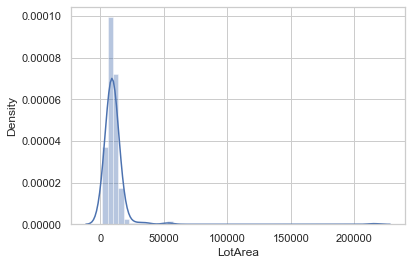

In [148]:
sns.distplot(df_ts['LotArea']);
#skewness and kurtosis
print("Skewness: %f" % df_ts['LotArea'].skew())


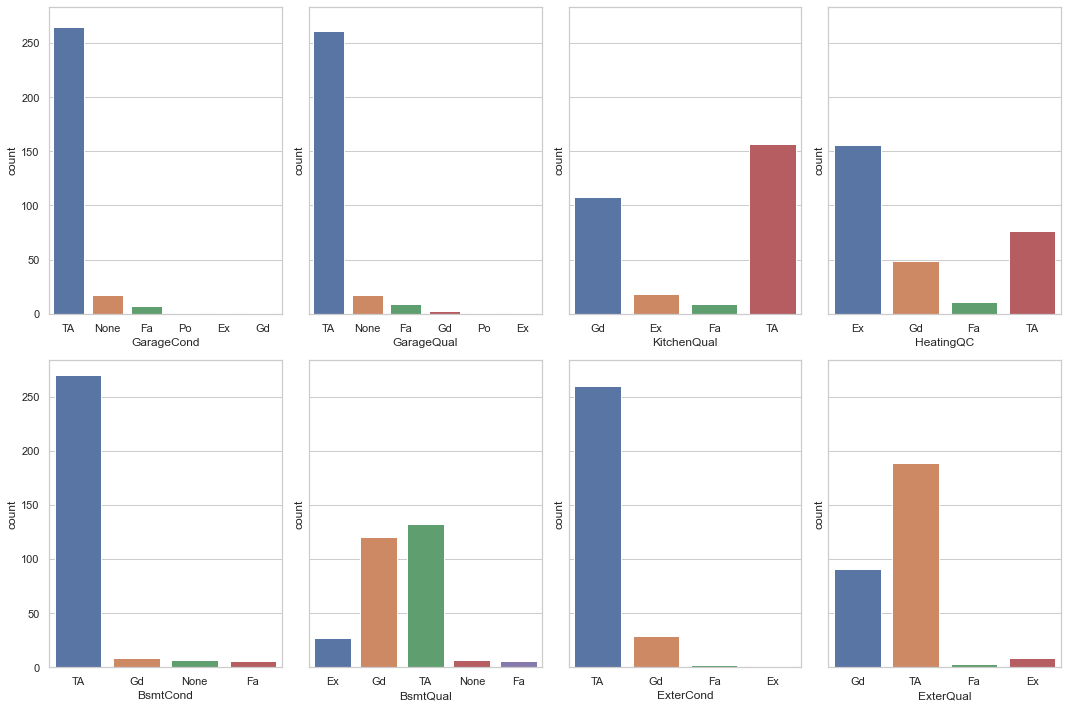

In [149]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.countplot(x=ord_cols.pop(),  \
        data=df_ts, ax=axes[r][c])

plt.tight_layout()
plt.show()

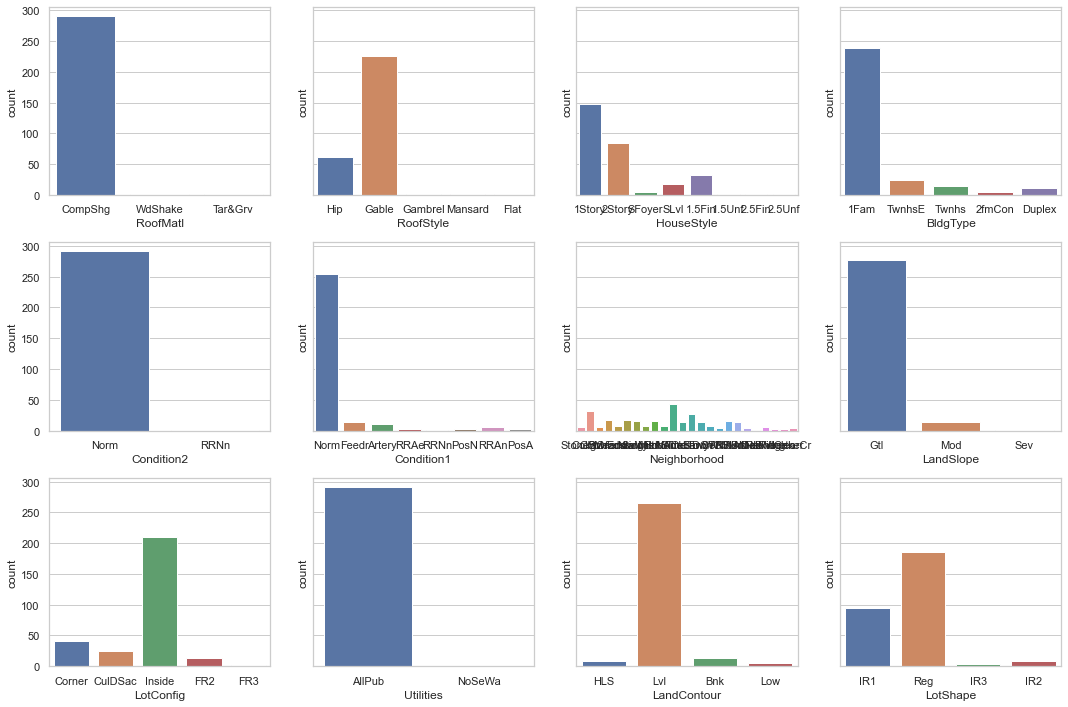

In [150]:

ord_cols1 = ['LotShape', 'LandContour', 'Utilities', 'LotConfig', \
'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl']
f, axes = plt.subplots(3, 4, figsize=(15, 10), sharey=True)

for r in range(0, 3):
    for c in range(0, 4):
        sns.countplot(x=ord_cols1.pop(),  \
        data=df_ts, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [151]:
df_ts['RoofMatl'].unique()

array(['CompShg', 'WdShake', 'Tar&Grv'], dtype=object)

In [152]:
df_ts['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

<AxesSubplot:>

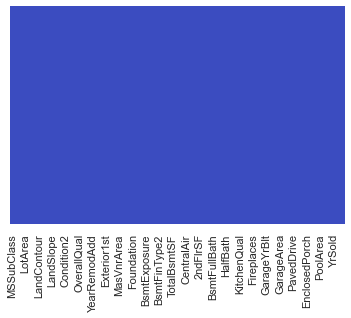

In [153]:
sns.heatmap(df_ts.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [154]:
df_ts.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Corner       Gtl  ...          51             0         0   
1    AllPub   CulDSac       Gtl  ...           0             0         0   
2    AllPub    Inside       Gtl  ...         151             0         0   
3    AllPub    Inside       Gtl  ...           0             0         0   
4    AllPub   CulDSac       Gtl  ...          18             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0           0        0        0       7    2007        WD        Normal  
1           0        0        0       8    2009       COD       Abnorml  
2           0        0        0       6    2009        WD        Normal  
3           0        0        0       7    2009        WD        Normal  
4           0        0        0       1    2008        WD        Normal  

[5 rows x 75 columns]

# Encoding of Test dataset

In [155]:
label_encoders = {}
#categorical_columns = [0, 1, 2, 3]  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_feats:
    label_encoders[column] = LabelEncoder()
    df_ts[column] = label_encoders[column].fit_transform(df_ts[column])

In [156]:
df_ts.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2    86.000000    14157       1         0            1   
1         120         2    66.425101     5814       1         0            3   
2          20         2    66.425101    11838       1         3            3   
3          70         2    75.000000    12000       1         3            0   
4          60         2    86.000000    14598       1         0            3   

   Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0          0          0          0  ...           51              0   
1          0          1          0  ...            0              0   
2          0          4          0  ...          151              0   
3          0          4          0  ...            0              0   
4          0          1          0  ...           18              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0            0         0        0       7    2007         5   
1          0            0         0        0       8    2009         0   
2          0            0         0        0       6    2009         5   
3          0            0         0        0       7    2009         5   
4          0            0         0        0       1    2008         5   

   SaleCondition  
0              2  
1              0  
2              2  
3              2  
4              2  

[5 rows x 75 columns]

In [157]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    int32  
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    int32  
 5   LotShape       292 non-null    int32  
 6   LandContour    292 non-null    int32  
 7   Utilities      292 non-null    int32  
 8   LotConfig      292 non-null    int32  
 9   LandSlope      292 non-null    int32  
 10  Neighborhood   292 non-null    int32  
 11  Condition1     292 non-null    int32  
 12  Condition2     292 non-null    int32  
 13  BldgType       292 non-null    int32  
 14  HouseStyle     292 non-null    int32  
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

In [158]:
df_ts['Utilities'].unique()

array([0, 1])

# Outliers
We can also take a look at the outliers in the all the variables.

In [159]:
# Get only numerical columns
numerical_columns = \
list(df_ts.dtypes[df_ts.dtypes == 'int64'].index)

len(numerical_columns)

33

In [160]:
# Get only numerical columns
numerical_columns = \
list(df_ts.dtypes[df_ts.dtypes == 'int32'].index)

len(numerical_columns)

39

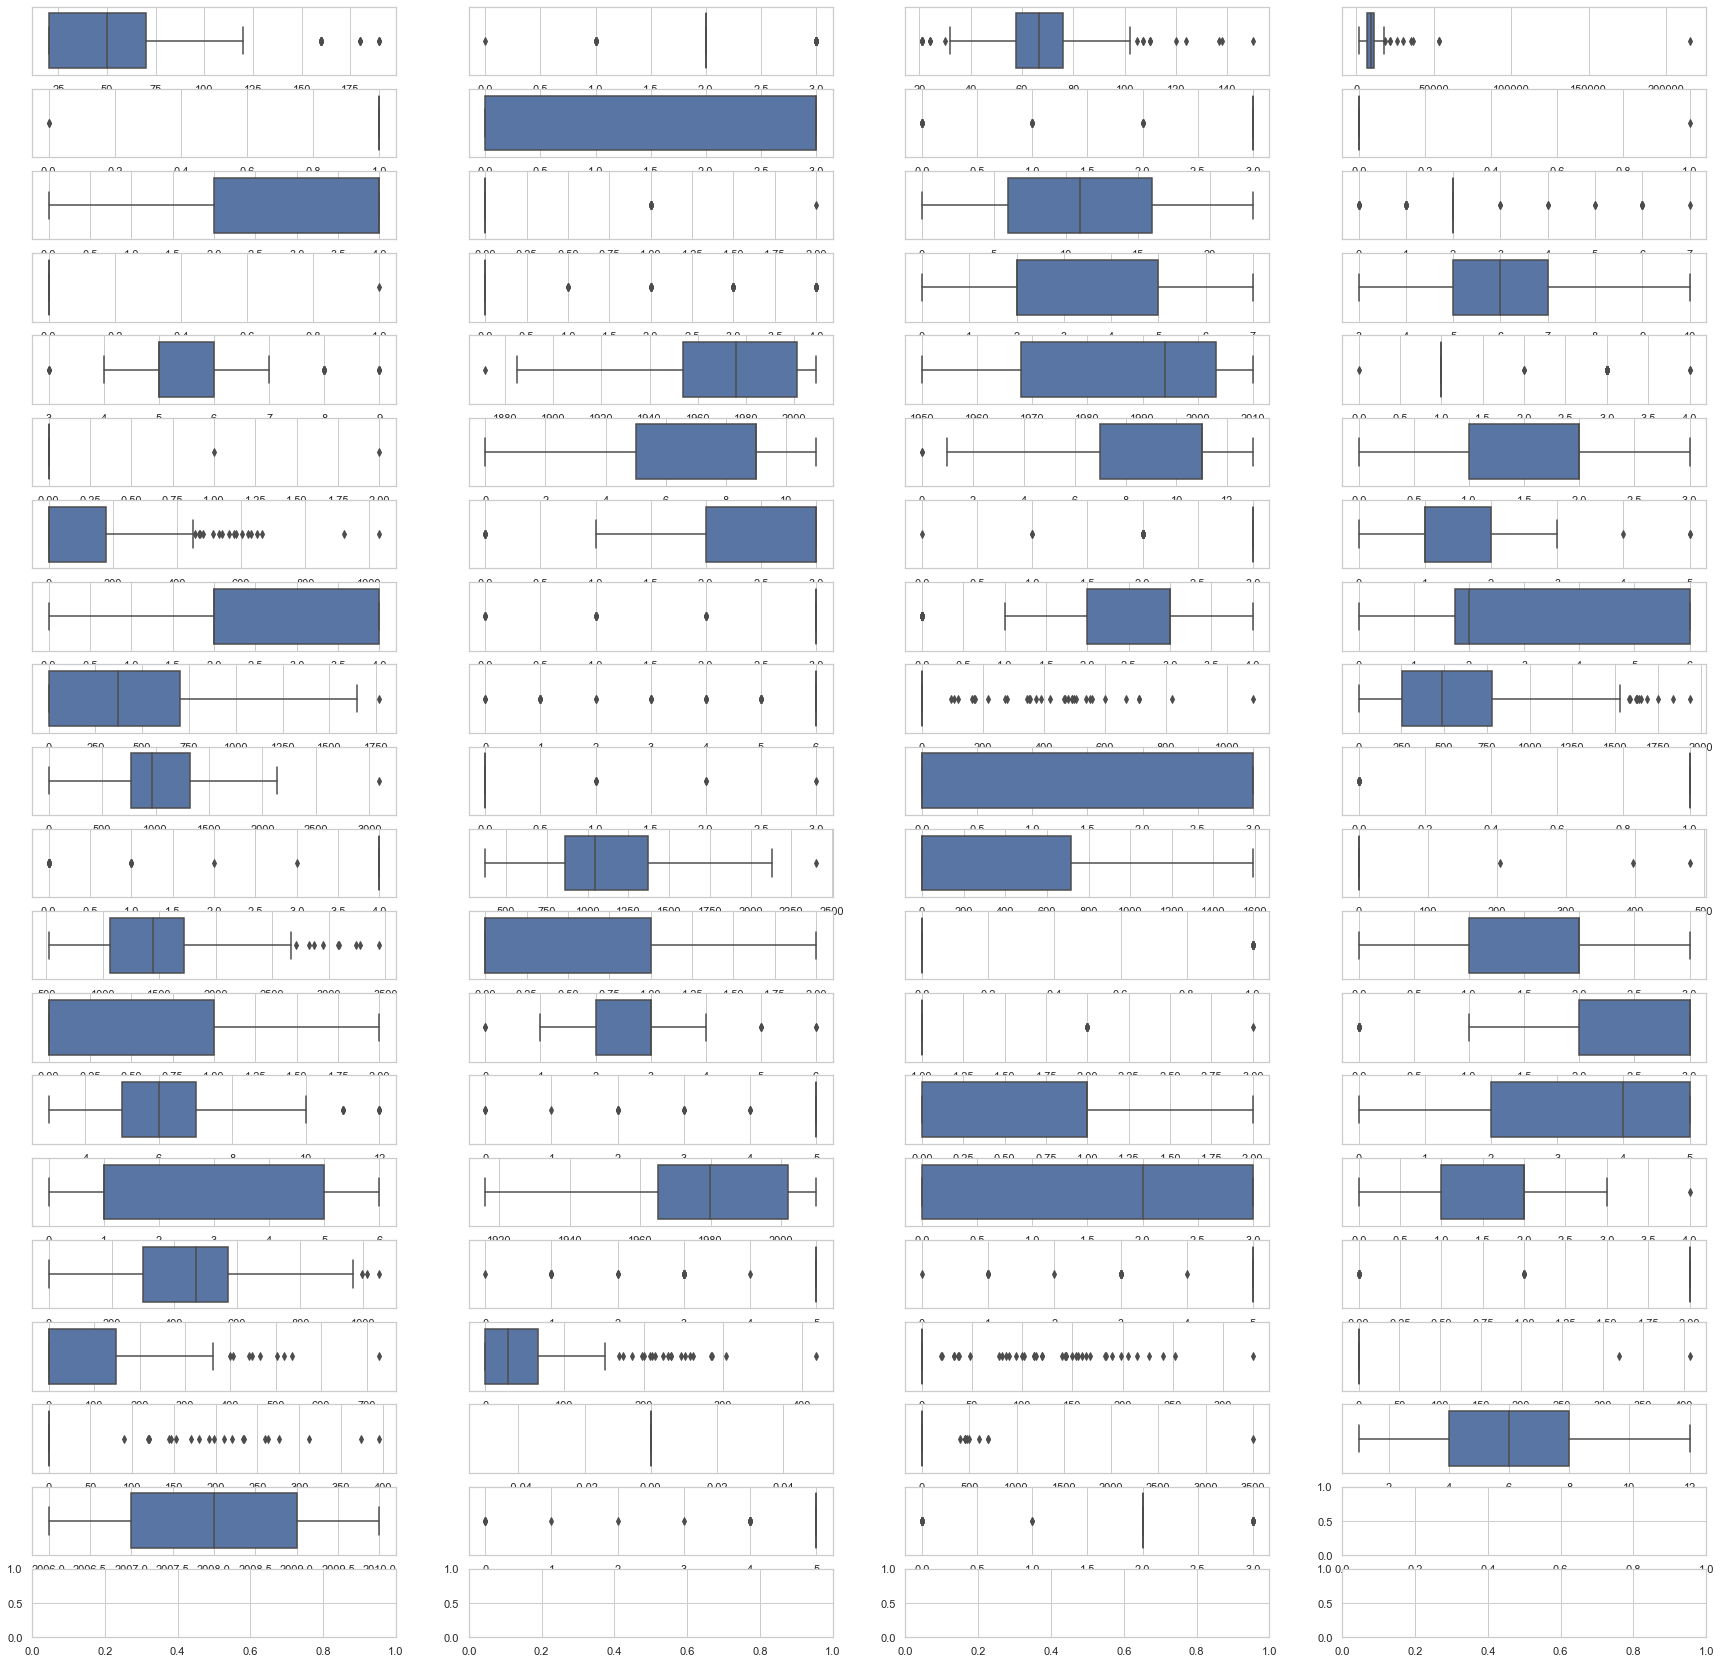

In [161]:
# Create the plot grid
rows = 20
columns = 4

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(df_ts.columns):
    sns.boxplot(x=df_ts[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

Some outliers are present

In [162]:
df_ts.describe()

MSSubClass    MSZoning  LotFrontage        LotArea      Street  \
count  292.000000  292.000000   292.000000     292.000000  292.000000   
mean    57.414384    2.136986    66.425101   10645.143836    0.993151   
std     43.780649    0.478114    19.975962   13330.669795    0.082618   
min     20.000000    0.000000    21.000000    1526.000000    0.000000   
25%     20.000000    2.000000    57.750000    7200.000000    1.000000   
50%     50.000000    2.000000    66.425101    9200.000000    1.000000   
75%     70.000000    2.000000    76.000000   11658.750000    1.000000   
max    190.000000    3.000000   150.000000  215245.000000    1.000000   

         LotShape  LandContour   Utilities   LotConfig   LandSlope  ...  \
count  292.000000   292.000000  292.000000  292.000000  292.000000  ...   
mean     1.958904     2.791096    0.003425    3.078767    0.054795  ...   
std      1.398953     0.699182    0.058521    1.541174    0.242576  ...   
min      0.000000     0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000     3.000000    0.000000    2.000000    0.000000  ...   
50%      3.000000     3.000000    0.000000    4.000000    0.000000  ...   
75%      3.000000     3.000000    0.000000    4.000000    0.000000  ...   
max      3.000000     3.000000    1.000000    4.000000    2.000000  ...   

       OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  PoolArea  \
count   292.000000     292.000000  292.000000   292.000000     292.0   
mean     47.061644      17.708904    2.489726    15.099315       0.0   
std      65.865449      51.892906   30.247488    58.483473       0.0   
min       0.000000       0.000000    0.000000     0.000000       0.0   
25%       0.000000       0.000000    0.000000     0.000000       0.0   
50%      28.500000       0.000000    0.000000     0.000000       0.0   
75%      66.000000       0.000000    0.000000     0.000000       0.0   
max     418.000000     330.000000  407.000000   396.000000       0.0   

           MiscVal      MoSold       YrSold    SaleType  SaleCondition  
count   292.000000  292.000000   292.000000  292.000000     292.000000  
mean     28.184932    6.232877  2007.859589    4.828767       1.914384  
std     224.036218    2.774556     1.322867    0.744829       0.576932  
min       0.000000    1.000000  2006.000000    0.000000       0.000000  
25%       0.000000    4.000000  2007.000000    5.000000       2.000000  
50%       0.000000    6.000000  2008.000000    5.000000       2.000000  
75%       0.000000    8.000000  2009.000000    5.000000       2.000000  
max    3500.000000   12.000000  2010.000000    5.000000       3.000000  

[8 rows x 75 columns]

In [165]:
df_ts.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.266517    -0.454786 -0.186654  0.004588   
MSZoning         0.266517  1.000000    -0.335754 -0.117968 -0.063162   
LotFrontage     -0.454786 -0.335754     1.000000  0.370091 -0.056531   
LotArea         -0.186654 -0.117968     0.370091  1.000000 -0.069626   
Street           0.004588 -0.063162    -0.056531 -0.069626  1.000000   
...                   ...       ...          ...       ...       ...   
MiscVal          0.137542  0.090554     0.031567 -0.020398  0.010465   
MoSold          -0.004079  0.074308    -0.045333 -0.034709  0.036965   
YrSold           0.044441 -0.072716     0.059745  0.041735 -0.040272   
SaleType        -0.105307  0.123993     0.034876  0.037096 -0.019125   
SaleCondition   -0.010155  0.005290     0.037168  0.030689 -0.012345   

               LotShape  LandContour     Utilities  LotConfig  LandSlope  ...  \
MSSubClass     0.176681     0.068736 -5.018279e-02   0.071784  -0.073979  ...   
MSZoning       0.167716    -0.099137 -1.682458e-02   0.055261  -0.035312  ...   
LotFrontage   -0.147720    -0.086163 -8.730211e-18  -0.124470   0.176406  ...   
LotArea       -0.110574    -0.131482  1.643004e-02  -0.042599   0.620079  ...   
Street        -0.002444     0.153613  4.868212e-03   0.058229  -0.324146  ...   
...                 ...          ...           ...        ...        ...  ...   
MiscVal        0.017304     0.037718 -7.387495e-03   0.029676  -0.028515  ...   
MoSold         0.033461     0.037564 -1.107504e-01   0.019805  -0.100718  ...   
YrSold         0.097144     0.064777  5.062251e-02   0.008814   0.013349  ...   
SaleType       0.072375     0.056451 -3.806956e-01   0.104593   0.052109  ...   
SaleCondition  0.033945    -0.027454 -1.948510e-01   0.092637   0.033637  ...   

               OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
MSSubClass       -0.097449      -0.047570  -0.045672    -0.072139       NaN   
MSZoning         -0.139292       0.183748  -0.023665    -0.059479       NaN   
LotFrontage       0.075946      -0.060176   0.111523     0.068553       NaN   
LotArea           0.067269      -0.055667   0.007832     0.090367       NaN   
Street           -0.106646       0.028389   0.006847    -0.165571       NaN   
...                    ...            ...        ...          ...       ...   
MiscVal          -0.029976      -0.020024   0.103201    -0.032592       NaN   
MoSold            0.081174       0.003169   0.062146    -0.012744       NaN   
YrSold           -0.024945      -0.027079   0.036249    -0.014433       NaN   
SaleType         -0.015685      -0.065219   0.018988    -0.032347       NaN   
SaleCondition     0.056298      -0.129965   0.012257    -0.112899       NaN   

                MiscVal    MoSold    YrSold  SaleType  SaleCondition  
MSSubClass     0.137542 -0.004079  0.044441 -0.105307      -0.010155  
MSZoning       0.090554  0.074308 -0.072716  0.123993       0.005290  
LotFrontage    0.031567 -0.045333  0.059745  0.034876       0.037168  
LotArea       -0.020398 -0.034709  0.041735  0.037096       0.030689  
Street         0.010465  0.036965 -0.040272 -0.019125      -0.012345  
...                 ...       ...       ...       ...            ...  
MiscVal        1.000000  0.009583  0.140017  0.029021       0.018734  
MoSold         0.009583  1.000000 -0.149289  0.044305       0.087636  
YrSold         0.140017 -0.149289  1.000000 -0.097726      -0.083345  
SaleType       0.029021  0.044305 -0.097726  1.000000       0.349621  
SaleCondition  0.018734  0.087636 -0.083345  0.349621       1.000000  

[75 rows x 75 columns]

<Figure size 432x288 with 0 Axes>

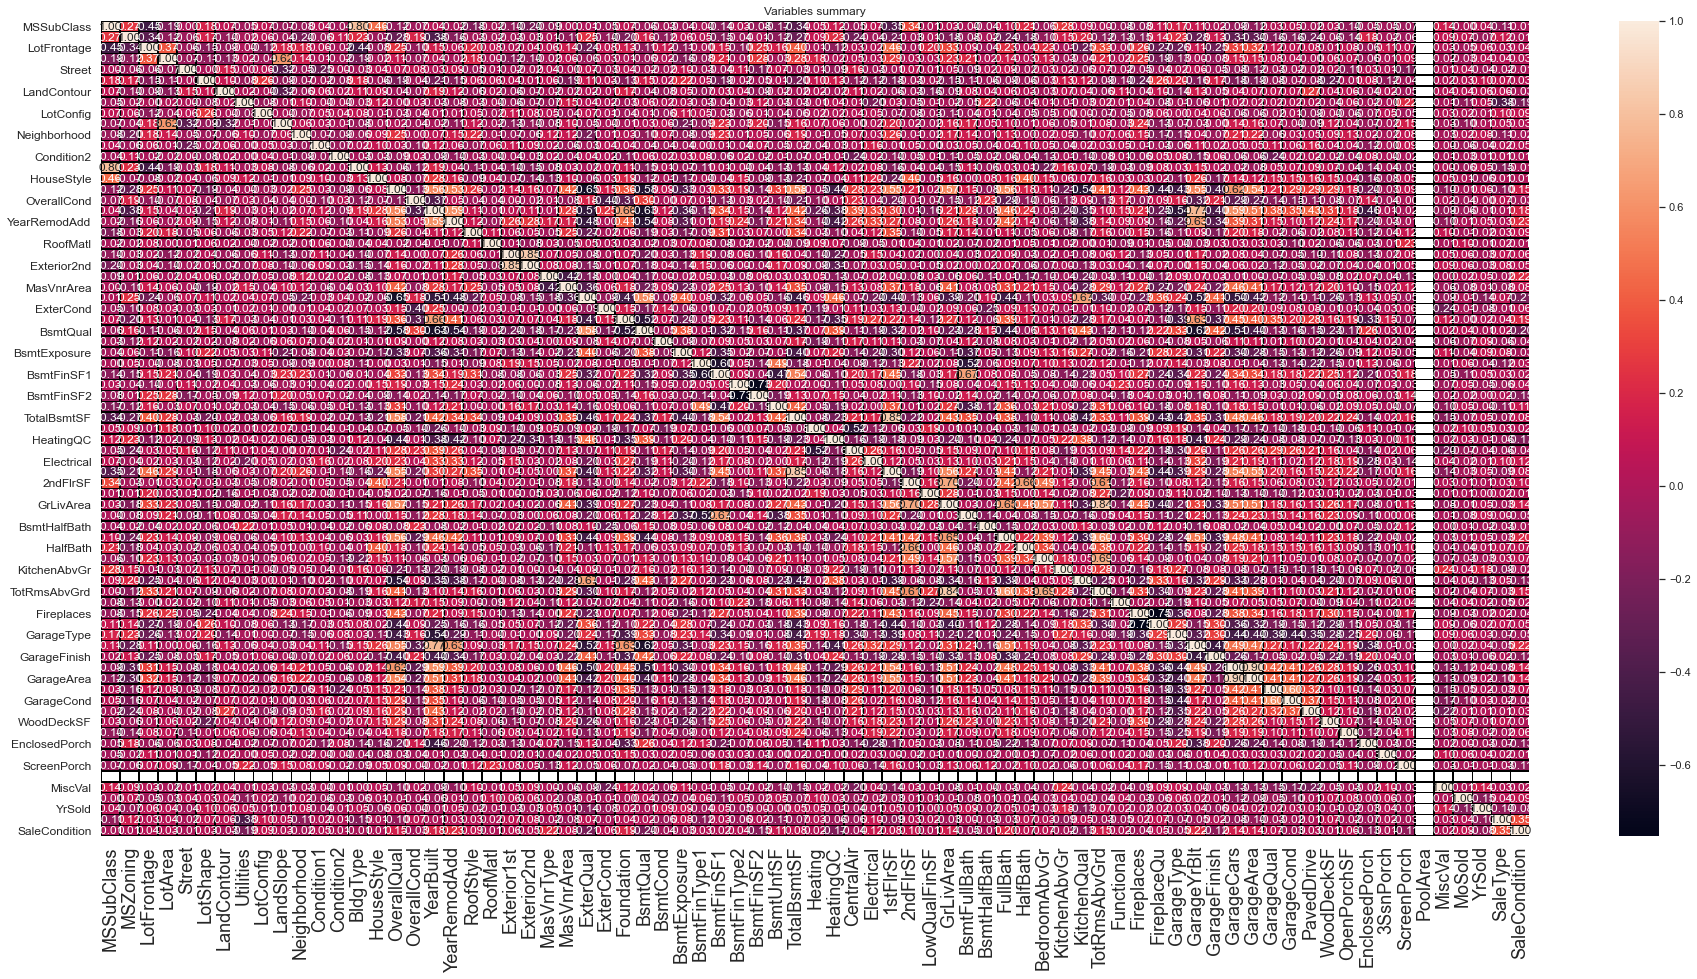

In [166]:
plt.figure()
plt.figure(figsize=(32,15))
sns.heatmap(df_ts.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [167]:
df_ts.skew()

MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 75, dtype: float64

Skewness is present

# Removing skewness of test dataset by transforming data:

In [179]:
x1=df_ts.iloc[:,:]
x1

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            20         2    86.000000    14157       1         0   
1           120         2    66.425101     5814       1         0   
2            20         2    66.425101    11838       1         3   
3            70         2    75.000000    12000       1         3   
4            60         2    86.000000    14598       1         0   
..          ...       ...          ...      ...     ...       ...   
287          20         2    78.000000    10206       1         3   
288          20         2    57.000000     9245       1         1   
289          20         2    66.425101    11241       1         0   
290          50         3    50.000000     5000       1         3   
291         160         3    21.000000     1953       1         3   

     LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
0              1          0          0          0  ...           51   
1              3          0          1          0  ...            0   
2              3          0          4          0  ...          151   
3              0          0          4          0  ...            0   
4              3          0          1          0  ...           18   
..           ...        ...        ...        ...  ...          ...   
287            3          0          4          0  ...           99   
288            3          0          4          0  ...            0   
289            3          0          1          0  ...            0   
290            3          0          0          0  ...           24   
291            3          0          4          0  ...            0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0                0          0            0         0        0       7    2007   
1                0          0            0         0        0       8    2009   
2                0          0            0         0        0       6    2009   
3                0          0            0         0        0       7    2009   
4                0          0            0         0        0       1    2008   
..             ...        ...          ...       ...      ...     ...     ...   
287              0          0            0         0        0      10    2008   
288              0          0            0         0        0       2    2008   
289              0          0            0         0      700       3    2010   
290             36          0            0         0        0      10    2006   
291              0          0            0         0        0       6    2006   

     SaleType  SaleCondition  
0           5              2  
1           0              0  
2           5              2  
3           5              2  
4           5              2  
..        ...            ...  
287         5              2  
288         5              2  
289         5              2  
290         5              2  
291         5              2  

[292 rows x 75 columns]

In [180]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')

# Scaling the test data

In [181]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x1_t=sc.fit_transform(x1)


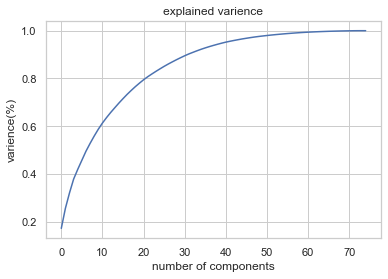

In [182]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x1_t)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("varience(%)")
plt.title("explained varience")
plt.show()

In [183]:
pca=PCA(n_components=60)
new_data=pca.fit_transform(x1_t)
principal_y=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                           'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20',
                                           'PC-21','PC-22','PC-23','PC-24','PC-25','PC-26','PC-27','PC-28','PC-29','PC-30',
                                           'PC-31','PC-32','PC-33','PC-34','PC-35','PC-36','PC-37','PC-38','PC-39','PC-40',
                                           'PC-41','PC-42','PC-43','PC-44','PC-45','PC-46','PC-47','PC-48','PC-49','PC-50',
                                            'PC-51','PC-52','PC-53','PC-54','PC-55','PC-56','PC-57','PC-58','PC-59','PC-60'])

In [184]:
principal_y

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0    1.884634 -0.912938  0.143172 -0.574069  0.386580  0.409259 -0.082811   
1    0.581538 -0.681018 -0.715133  0.278437  0.536721  1.081052 -0.352124   
2    0.876153 -0.028664  1.165028 -0.214554 -0.587289  0.068293  0.072714   
3   -0.369904  0.837222 -0.340456 -0.455663 -0.394893 -0.325302  0.383502   
4    1.519696  1.017276  0.058065 -0.633651  0.463404  0.106769 -0.163623   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.988371 -0.292323  0.689365 -0.164796 -0.845341 -0.036739 -0.239554   
288 -0.332195 -0.590602  0.525744  0.074432  0.281106 -0.959243 -0.305853   
289  0.191412 -1.019923 -0.320527 -0.346055  0.556619 -0.336362 -0.238904   
290 -0.675422  0.197391 -0.507991 -0.812071  0.164740 -0.211957  0.281670   
291 -0.836634  0.819747 -0.929654  1.179398  0.024090 -0.021721 -0.700248   

         PC-8      PC-9     PC-10  ...     PC-51     PC-52     PC-53  \
0    0.151172  0.186538  0.047083  ...  0.047067  0.092429 -0.163604   
1    0.052612  0.485373 -0.695698  ...  0.052005 -0.003126  0.024991   
2   -0.470734  0.080593 -0.330962  ...  0.066645  0.025469  0.061626   
3    0.276617 -0.411829 -0.539183  ... -0.007964  0.013779 -0.167861   
4   -0.053353  0.445222  0.133849  ... -0.045636  0.094050  0.123430   
..        ...       ...       ...  ...       ...       ...       ...   
287 -0.210652 -0.103352 -0.094493  ... -0.052953 -0.015926 -0.136699   
288 -0.284308  0.018587  0.061802  ... -0.010463 -0.022639  0.064970   
289  0.721721 -0.009282  0.485789  ...  0.072989  0.148072 -0.067577   
290  0.708798 -0.261604 -1.037593  ... -0.000281  0.036507  0.007039   
291 -0.303352 -0.253287 -0.071740  ... -0.009729 -0.080346 -0.000700   

        PC-54     PC-55     PC-56     PC-57     PC-58     PC-59     PC-60  
0   -0.033456  0.089845  0.052048  0.096319  0.047803  0.036240  0.030161  
1   -0.028914 -0.047759 -0.091972 -0.038876  0.085343 -0.116096  0.029355  
2   -0.109496  0.062006  0.063464  0.133512  0.017042 -0.012322  0.037371  
3   -0.041854  0.017649  0.016878  0.027964 -0.010994 -0.082420 -0.052758  
4    0.031409  0.056727 -0.009416  0.015614 -0.171240  0.069901 -0.024147  
..        ...       ...       ...       ...       ...       ...       ...  
287 -0.017925  0.108661 -0.091505  0.015223  0.059173 -0.043331 -0.043895  
288 -0.002505  0.048031 -0.064565 -0.018269 -0.042866  0.087208 -0.066963  
289  0.012448  0.007028 -0.043233 -0.041386  0.044102  0.132637 -0.038042  
290  0.028792  0.090452  0.080930 -0.143557  0.004777 -0.028596  0.084905  
291  0.135492  0.036496 -0.083067  0.082287  0.132724 -0.031166  0.022421  

[292 rows x 60 columns]

# Regressor Model Building:

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [198]:
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0     0.078518 -0.157019 -0.004592 -0.467546 -0.505744 -0.105343 -0.218866   
1    -0.362268 -0.817476  0.855887 -0.087227 -0.221052  0.268060 -0.224786   
2    -0.986077  0.450274  0.419103  0.490478 -0.107325  0.270119 -0.450477   
3    -0.090856 -0.522034  0.024053 -0.571825 -0.559667 -0.177281 -0.129640   
4    -0.405361 -0.702150  0.174039 -0.305830 -0.338873  0.499555  0.469023   
...        ...       ...       ...       ...       ...       ...       ...   
1163  1.037982 -0.460700 -0.093690 -0.005872 -0.758903  0.033092 -0.068464   
1164  0.680926 -0.194209 -0.765050 -0.238767 -0.210584 -0.293719  0.202682   
1165  0.167467  0.876760  0.349534  0.335065  0.177620 -0.023773  0.659465   
1166  1.351199  0.958434 -0.538181 -0.123178  0.396798  0.304474 -0.681446   
1167 -1.311955  0.424411  0.330831  0.199027 -0.058725  0.096988 -0.295949   

          PC-8      PC-9     PC-10  ...     PC-51     PC-52     PC-53  \
0    -0.201651 -0.163610 -0.245756  ... -0.008572  0.005547 -0.101404   
1    -0.277202  0.322756  0.184634  ... -0.142120 -0.136337  0.075925   
2    -0.303667 -0.124464  0.057353  ... -0.105799 -0.090798  0.097728   
3     0.607947 -0.224511  0.235223  ...  0.020927 -0.050639 -0.090117   
4     0.310774 -0.073991 -0.215328  ... -0.059064  0.110979  0.025191   
...        ...       ...       ...  ...       ...       ...       ...   
1163  0.543117 -0.341834 -0.225885  ...  0.019257  0.020317  0.039080   
1164  0.373311  0.089428  0.688816  ...  0.116063 -0.000041 -0.053505   
1165  0.101571 -0.338248 -0.278446  ... -0.103394 -0.069388 -0.069215   
1166  0.054728  0.143892  0.491116  ...  0.058841  0.171177  0.175935   
1167 -0.376255 -0.037634  0.021905  ...  0.009063 -0.124119  0.015855   

         PC-54     PC-55     PC-56     PC-57     PC-58     PC-59     PC-60  
0    -0.008822 -0.066109  0.034097 -0.013046 -0.027058 -0.030993  0.051213  
1    -0.081789  0.010646 -0.068131 -0.024182  0.035406 -0.032901 -0.016933  
2     0.005965 -0.027345 -0.021128  0.028879 -0.025970  0.064831 -0.026984  
3    -0.133994  0.089578  0.030829  0.012552 -0.061697 -0.028400 -0.035660  
4    -0.033678  0.001886  0.100317  0.024205 -0.001382 -0.010203 -0.012753  
...        ...       ...       ...       ...       ...       ...       ...  
1163  0.029633  0.048929 -0.067935  0.077767  0.155020  0.005855  0.023794  
1164  0.016585 -0.000326  0.202091 -0.082090 -0.039884  0.062120 -0.014064  
1165 -0.003687 -0.095686 -0.121246 -0.091988 -0.091491  0.046018 -0.258901  
1166 -0.055614  0.072645  0.056297 -0.073863 -0.105821  0.053771  0.032138  
1167 -0.020806 -0.054383  0.039980  0.096650 -0.018168 -0.013861  0.000349  

[1168 rows x 60 columns]

In [199]:
y=df_tr.iloc[:,-1]
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [200]:
max_scr=0
for i in range(0,4000):
    x_train,x_test,y_train,y_test=train_test_split(principal_x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 619  The model performs very well
At random_state:- 619
Training r2_score is:- 81.45311248928373
Testing r2_score is:- 81.44527221882387
At random state 2948  The model performs very well
At random_state:- 2948
Training r2_score is:- 81.4808582010113
Testing r2_score is:- 81.47503871188528
At random state 3305  The model performs very well
At random_state:- 3305
Training r2_score is:- 81.32762371033546
Testing r2_score is:- 81.32933158660565
At random state 3724  The model performs very well
At random_state:- 3724
Training r2_score is:- 81.40697102482794
Testing r2_score is:- 81.41060848338384


In [208]:
x_train_b,x_test_b_b,y_train_b,y_test_b=train_test_split(principal_x,y,random_state=619,test_size=0.20)

In [203]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)  

Training r2_score is:- 81.45311248928373
Testing r2_score is:- 81.44527221882387


In [204]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print("mean absolute error:",mean_absolute_error(pred_test,y_test))  # no change if we interchange pred and y_test values
print("mean squared error:",mean_squared_error(pred_test,y_test))
print("root mean squared error:",np.sqrt(mean_squared_error(pred_test,y_test)))


Error:
mean absolute error: 22421.53201758391
mean squared error: 1190160190.1851063
root mean squared error: 34498.698383926116


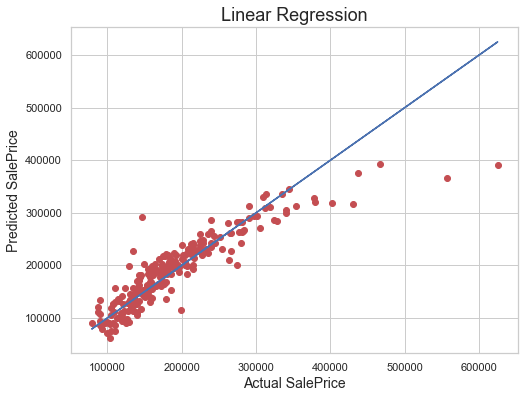

In [205]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization


# 1. Lasso:

In [207]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [209]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 73.56669633688138
R2_score is :- 81.43466209035664


At cv:- 3
Cross validation score is:- 75.77943277875012
R2_score is :- 81.43466209035664


At cv:- 4
Cross validation score is:- 76.90982983243006
R2_score is :- 81.43466209035664


At cv:- 5
Cross validation score is:- 76.15599265666724
R2_score is :- 81.43466209035664


At cv:- 6
Cross validation score is:- 77.54847450898468
R2_score is :- 81.43466209035664


At cv:- 7
Cross validation score is:- 76.40282050828525
R2_score is :- 81.43466209035664


At cv:- 8
Cross validation score is:- 77.61060967873064
R2_score is :- 81.43466209035664


At cv:- 9
Cross validation score is:- 76.57540467877601
R2_score is :- 81.43466209035664




In [210]:
print("At cv:-",8)
print("Cross validation score is:-",77.610 )
print("R2_score is :-",81.434)

At cv:- 8
Cross validation score is:- 77.61
R2_score is :- 81.434


In [211]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 22334.833641385823
Mean Squared Error: 1190840758.106306
Root Mean Square Error: 34508.56064958819


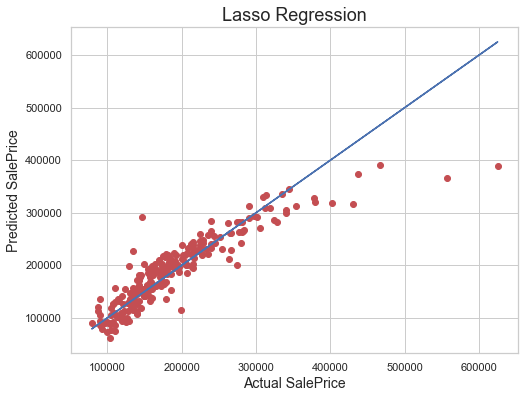

In [213]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [214]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [215]:
rd = Ridge(alpha=1, copy_X= True, fit_intercept= True, normalize=False, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=8)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 81.5432179263445
Cross Val Score: 77.59606956884963


In [216]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 22201.717724720154
Mean Squared Error: 1183877636.0422847
Root Mean Square Error: 34407.52295708432


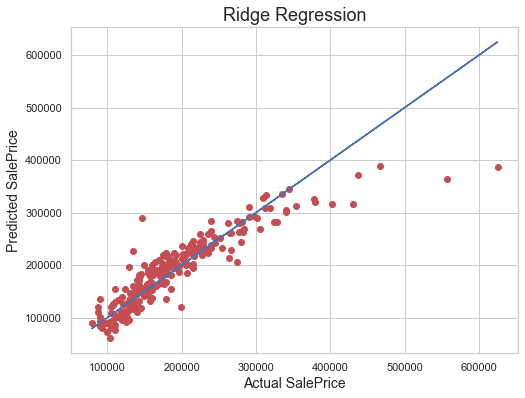

In [217]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# Ensemble Techniques:

In [218]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [221]:
dt = DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=8)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 54.82148871785078
Cross Val Score: 74.69627826877094


In [222]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 34522.23504273504
Mean Squared Error: 2897895685.3461537
Root Mean Square Error: 53832.10645466285


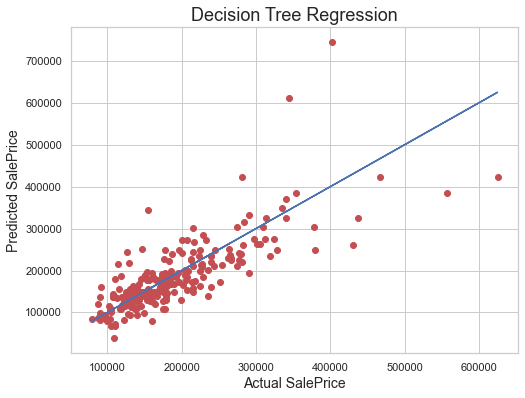

In [223]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [224]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 200}


In [225]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = gbr.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=5)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 85.06483088010724
Cross Val Score: 87.1919520917541


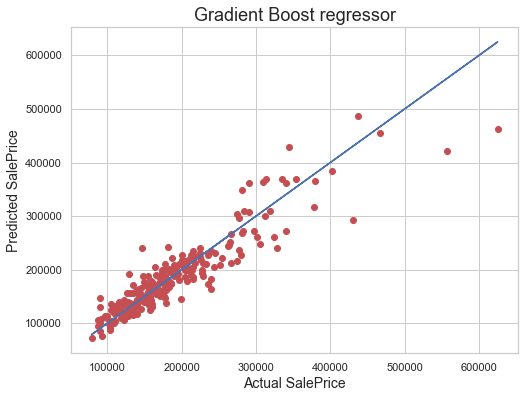

In [226]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [227]:
import xgboost
print(xgboost.__version__)

1.4.2


In [228]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor


In [229]:
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,x,y,cv=5)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)


R2 Score: 81.98573734525976
Cross Val Score: 87.675600810511


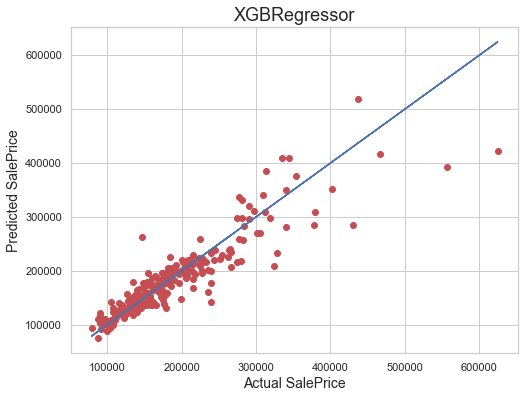

In [230]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('XGBRegressor',fontsize=18)
plt.show()

In [231]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,x,y,cv=8)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)

KNR score: 0.8922867767534057
R2 Score: 60.85191944336567
Cross Val Score: 68.49381963457661


In [232]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 2511084374.298077
Root Mean Squared error: 50110.72115124744


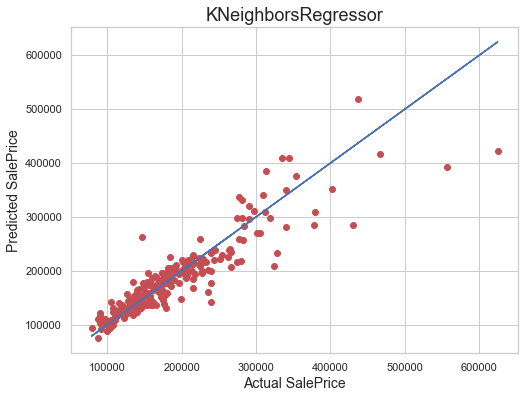

In [233]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

In [234]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_b,y_train_b)
print("SVR score:",svr.score(x_train_b,y_train_b))

svr_pred=svr.predict(x_test_b)
svrs= r2_score(y_test_b,svr_pred)
print('R2 Score:',svrs*100)
svrscore = cross_val_score(svr,x,y,cv=8)
svrc= svrscore.mean() 
print('Cross Val Score:',svrc*100)

SVR score: -0.050724670524395776
R2 Score: -11.325494941853421
Cross Val Score: -5.670135255235001


In [235]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'learning_rate': 1.5, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 0}


In [236]:
abr= AdaBoostRegressor(learning_rate= 1.5, loss= 'exponential', n_estimators= 50, random_state= 0)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,x,y,cv=8)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 72.6480356365833
Cross Val Score: 80.90867324432661


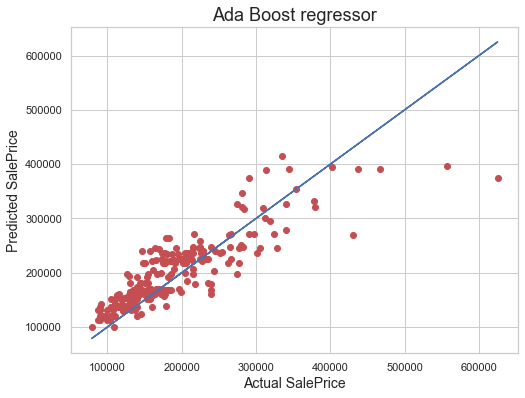

In [237]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

In [238]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'linear'}


In [239]:
sv = SVR(kernel = 'linear', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=8)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: -10.188094308659036
Cross Val Score: 14.572025063530155


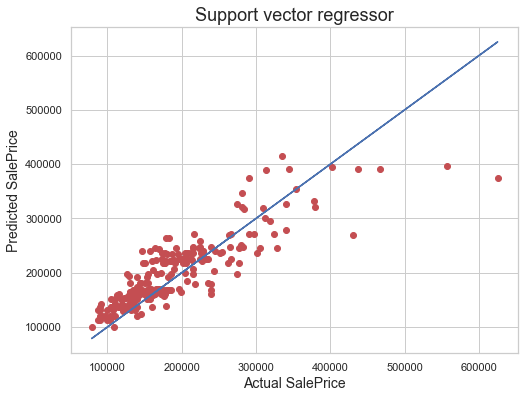

In [240]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual SalePrice',fontsize=14)
plt.ylabel('Predicted SalePrice',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is GradientBoostingRegressor.
Since the difference between the percentage score of cross validation and r2_score is optimum.

R2 Score: 85.06483088010724
Cross Val Score: 87.1919520917541

# Model Saving

In [241]:
import pickle
filename = 'in_housing.pkl'
pickle.dump(gbr,open(filename, 'wb'))

# Conclusion

In [246]:
y_test

1124    264561
735     101800
80      204900
639     129000
997     262000
         ...  
828     110000
869     217500
839     625000
432     198500
813     158500
Name: SalePrice, Length: 234, dtype: int64

In [254]:
a=np.array(y_test)
a

array([264561, 101800, 204900, 129000, 262000, 239000, 177000, 197000,
       153900, 193000, 140000,  87000, 377500, 119200, 156932, 212900,
       164000, 146000, 133000, 174000, 116500, 135000,  90000, 201000,
       191000, 341000, 179540, 140000, 176000, 114504, 142000, 277000,
       162500, 116000, 228500, 205000, 123000, 105000, 120500, 162000,
       127500, 170000, 180000, 173000, 135000, 168000, 109900, 123000,
       277000, 131000, 157900, 319000, 430000, 181500, 149900, 125000,
        79000, 107400, 119000, 140000, 137000, 140000, 312500, 172500,
       145000, 207500, 147000, 282922, 135000, 153900, 240000, 179000,
       228950, 324000, 290000, 215000, 227680, 345000, 305900, 290000,
       244000, 107500, 132000, 129000, 149900, 216500, 155000, 466500,
       190000, 135900, 275000, 235000, 142500, 138500, 119750, 143000,
        92900, 215000, 239000, 263000, 155000, 195000, 158000, 118500,
       180000, 159000, 207500, 103000, 183500, 171000, 297000, 240000,
      

In [243]:
principal_y

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0    1.884634 -0.912938  0.143172 -0.574069  0.386580  0.409259 -0.082811   
1    0.581538 -0.681018 -0.715133  0.278437  0.536721  1.081052 -0.352124   
2    0.876153 -0.028664  1.165028 -0.214554 -0.587289  0.068293  0.072714   
3   -0.369904  0.837222 -0.340456 -0.455663 -0.394893 -0.325302  0.383502   
4    1.519696  1.017276  0.058065 -0.633651  0.463404  0.106769 -0.163623   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.988371 -0.292323  0.689365 -0.164796 -0.845341 -0.036739 -0.239554   
288 -0.332195 -0.590602  0.525744  0.074432  0.281106 -0.959243 -0.305853   
289  0.191412 -1.019923 -0.320527 -0.346055  0.556619 -0.336362 -0.238904   
290 -0.675422  0.197391 -0.507991 -0.812071  0.164740 -0.211957  0.281670   
291 -0.836634  0.819747 -0.929654  1.179398  0.024090 -0.021721 -0.700248   

         PC-8      PC-9     PC-10  ...     PC-51     PC-52     PC-53  \
0    0.151172  0.186538  0.047083  ...  0.047067  0.092429 -0.163604   
1    0.052612  0.485373 -0.695698  ...  0.052005 -0.003126  0.024991   
2   -0.470734  0.080593 -0.330962  ...  0.066645  0.025469  0.061626   
3    0.276617 -0.411829 -0.539183  ... -0.007964  0.013779 -0.167861   
4   -0.053353  0.445222  0.133849  ... -0.045636  0.094050  0.123430   
..        ...       ...       ...  ...       ...       ...       ...   
287 -0.210652 -0.103352 -0.094493  ... -0.052953 -0.015926 -0.136699   
288 -0.284308  0.018587  0.061802  ... -0.010463 -0.022639  0.064970   
289  0.721721 -0.009282  0.485789  ...  0.072989  0.148072 -0.067577   
290  0.708798 -0.261604 -1.037593  ... -0.000281  0.036507  0.007039   
291 -0.303352 -0.253287 -0.071740  ... -0.009729 -0.080346 -0.000700   

        PC-54     PC-55     PC-56     PC-57     PC-58     PC-59     PC-60  
0   -0.033456  0.089845  0.052048  0.096319  0.047803  0.036240  0.030161  
1   -0.028914 -0.047759 -0.091972 -0.038876  0.085343 -0.116096  0.029355  
2   -0.109496  0.062006  0.063464  0.133512  0.017042 -0.012322  0.037371  
3   -0.041854  0.017649  0.016878  0.027964 -0.010994 -0.082420 -0.052758  
4    0.031409  0.056727 -0.009416  0.015614 -0.171240  0.069901 -0.024147  
..        ...       ...       ...       ...       ...       ...       ...  
287 -0.017925  0.108661 -0.091505  0.015223  0.059173 -0.043331 -0.043895  
288 -0.002505  0.048031 -0.064565 -0.018269 -0.042866  0.087208 -0.066963  
289  0.012448  0.007028 -0.043233 -0.041386  0.044102  0.132637 -0.038042  
290  0.028792  0.090452  0.080930 -0.143557  0.004777 -0.028596  0.084905  
291  0.135492  0.036496 -0.083067  0.082287  0.132724 -0.031166  0.022421  

[292 rows x 60 columns]

In [261]:
predicted=np.array(gbr.predict(principal_y))
predicted

array([100489.04064909, 138650.4257535 , 136927.0881614 , 171097.65712028,
       101643.84945849, 338545.13051797, 172291.73701946, 130972.3548725 ,
       108093.90529211, 148337.38345514, 436008.98841315, 224519.77695719,
       171810.26524331, 219072.26708767, 122971.89017374, 313024.74159908,
       195154.04711154, 323079.85270923, 152216.52925551, 164879.84782584,
       236046.0823341 , 168387.12868167, 191171.90281984, 270113.22574951,
       357547.75712871, 189302.79977625, 164177.2291142 , 166001.98241083,
       190105.8639476 , 350434.17656553, 241270.55244383, 155432.79873109,
       124684.31665922, 163023.05224227, 239357.1120648 , 148218.8060906 ,
       125265.15955169, 161938.41151346, 208714.33257141, 172822.09002414,
       280316.80334033, 115568.75265579, 135777.74480644, 162866.36228102,
       175074.65053144, 250939.40354714, 205231.46167872, 237797.74309891,
       103607.33636796,  83028.032317  , 276401.38537953, 133385.91189816,
       310260.88364047, 4

In [255]:
predicted1=predicted[:234]

In [256]:
len(predicted1)

234

In [257]:
df_com=pd.DataFrame({"original":a,"predicted":predicted1}, index= range(len(a)))
df_com

original      predicted
0      264561  100489.040649
1      101800  138650.425753
2      204900  136927.088161
3      129000  171097.657120
4      262000  101643.849458
..        ...            ...
229    110000  169782.470475
230    217500  323278.349746
231    625000  137646.638671
232    198500  235655.021991
233    158500  221900.920025

[234 rows x 2 columns]

# From the above table the model is predicted the values with 80 percent accuracy